# Initial Statistics

In [1]:
import mysql.connector
import operator

import numpy as np
import pandas as pd

import datetime

import statistics 
from scipy import stats

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#import plotly as py
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px

import ipywidgets as widgets
# import seaborn as sns


In [2]:
%matplotlib inline 
po.init_notebook_mode(connected=True)

In [3]:
 pd.set_option("display.max_rows", 5000)                           # To display more rows

In [4]:
 pd.reset_option("^display")                                       # Reset the number of rows displayed to default

### **Number of metabolites** - See which are the duplicates

In [5]:
# Retrieve all bioanalysis_metabolite table from DB

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query(''' select * from bioanalysis_metabolite ''', cnx, parse_dates=True)

df = pd.DataFrame(sql_query, columns=['id','common_name', 'id_bioeco','inchi', 'inchi_key', 'smiles'])

df

,id,common_name,id_bioeco,inchi,inchi_key,smiles
0,1,tobramycin,9222799514525203483,InChI=1S/C18H37N5O9/c19-3-9-8(25)2-7(22)17(29-...,NLVFBUXFDBBNBW-PBSUHMDJSA-N,C1C(C(C(C(C1N)OC2C(C(C(C(O2)CO)O)N)O)O)OC3C(CC...
1,2,Telithromycin,9222710493671371933,InChI=1S/C43H65N5O10/c1-12-33-43(8)37(48(41(53...,LJVAJPDWBABPEJ-UHFFFAOYSA-N,CCC1C2(C(C(C(=O)C(CC(C(C(C(=O)C(C(=O)O1)C)C)OC...
2,3,UNII-YCP4CS0W03,9222602442150781005,InChI=1S/C6H12N4.H2O4S/c1-4(2)10-6(8)5(7)3-9-1...,VKGPVOKDWZAKKE-UHFFFAOYSA-N,CC(C)N1C(=C(C=N1)N)N.OS(=O)(=O)O
3,4,"3,5-DIMETHYLPHENOL",9222471406831838542,"InChI=1S/C8H10O/c1-6-3-7(2)5-8(9)4-6/h3-5,9H,1...",TUAMRELNJMMDMT-UHFFFAOYSA-N,CC1=CC(=CC(=C1)O)C
4,5,5-Oxooctanoic acid,9222286964594510425,InChI=1S/C8H14O3/c1-2-4-7(9)5-3-6-8(10)11/h2-6...,OHGVWVVPDOAZSH-UHFFFAOYSA-N,CCCC(=O)CCCC(=O)O
5,6,AC1LCVJ0,9222148300385709759,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,UDMBCSSLTHHNCD-ASCDQALMSA-N,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)O)O)O
6,7,3-Chloro-5-fluoroisonicotinic acid,9221885079977129855,InChI=1S/C6H3ClFNO2/c7-3-1-9-2-4(8)5(3)6(10)11...,APKYTXKVPCYUOG-UHFFFAOYSA-N,C1=C(C(=C(C=N1)Cl)C(=O)O)F
7,8,None,9221877112145259159,InChI=1S/C61H86N13O13P.CN.Co/c1-29-21-38-39(22...,WNHNILJCIPJCDB-UHFFFAOYSA-N,CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)O[P+](=O)...
8,9,2-(Hexyloxy)ethanol,9221440159283858055,"InChI=1S/C8H18O2/c1-2-3-4-5-7-10-8-6-9/h9H,2-8...",UPGSWASWQBLSKZ-UHFFFAOYSA-N,CCCCCCOCCO
9,10,Methyl jasmonate,9221308421455500483,InChI=1S/C13H20O3/c1-3-4-5-6-11-10(7-8-12(11)1...,GEWDNTWNSAZUDX-PLNGDYQASA-N,CCC=CCC1C(CCC1=O)CC(=O)OC


In [6]:
#Contar nº de ids, praticamente contar o número de linhas
df['id'].count()

4304

There is *4304* metabolites in **Bioanalysis**.

In [7]:
# Which are the metabolites that are duplicated?

df_met_dupl = df[df.duplicated(['common_name','inchi','inchi_key', 'smiles'], keep = False)]

dupl_met = {}                                           # create a dictionary {metab:[id,id,...]}
for k,g in df_met_dupl.groupby(['common_name'])['id']:
    g = list(g)
    if k in dupl_met:
        dupl_met[k].extend(g)
    elif k not in dupl_met:
        dupl_met[k] = g
        
        
# print(df[df.common_name == 'Glycyrrhizic acid'])   
# the metab 'Glycyrrhizic acid' has 3 ids for the same metabolite but just 2 of them are equal, the other as different InChIKey

print(dupl_met)
    
                

{'4-Benzyloxyphenylacetic acid': [1159, 4062], 'AC1L2SOM': [1204, 3135], 'Creatine phosphate disodium salt': [546, 3567], 'Glycyrrhizic acid': [2592, 3708], 'HYDROXOCOBALAMIN': [2745, 3973], 'L-cystine': [679, 3367], 'Pregna-1,4-diene-3,20-dione,16,21-bis(acetyloxy)-9-fluoro-11,17-dihydroxy-, (11b,16a)-': [3004, 3776], 'SCHEMBL952350': [2945, 4008], 'Temsirolimus': [169, 3514], 'aluminium triphosphate': [3059, 3805], 'deltamethrin': [624, 2567], 'pimaricin': [2974, 4196]}


**ATENTION:** Use this dictionary above if one of the metabolite case studies is a duplicate!!

In [8]:
#Clean duplicates, bioeconomics has an error of duplicates, so we can't count the id_bioeco column
#since if we count it there isn't any duplicates to delete

df_cleaned = df[~df.duplicated(['common_name','inchi','inchi_key', 'smiles'])]

In [9]:
df_cleaned

,id,common_name,id_bioeco,inchi,inchi_key,smiles
0,1,tobramycin,9222799514525203483,InChI=1S/C18H37N5O9/c19-3-9-8(25)2-7(22)17(29-...,NLVFBUXFDBBNBW-PBSUHMDJSA-N,C1C(C(C(C(C1N)OC2C(C(C(C(O2)CO)O)N)O)O)OC3C(CC...
1,2,Telithromycin,9222710493671371933,InChI=1S/C43H65N5O10/c1-12-33-43(8)37(48(41(53...,LJVAJPDWBABPEJ-UHFFFAOYSA-N,CCC1C2(C(C(C(=O)C(CC(C(C(C(=O)C(C(=O)O1)C)C)OC...
2,3,UNII-YCP4CS0W03,9222602442150781005,InChI=1S/C6H12N4.H2O4S/c1-4(2)10-6(8)5(7)3-9-1...,VKGPVOKDWZAKKE-UHFFFAOYSA-N,CC(C)N1C(=C(C=N1)N)N.OS(=O)(=O)O
3,4,"3,5-DIMETHYLPHENOL",9222471406831838542,"InChI=1S/C8H10O/c1-6-3-7(2)5-8(9)4-6/h3-5,9H,1...",TUAMRELNJMMDMT-UHFFFAOYSA-N,CC1=CC(=CC(=C1)O)C
4,5,5-Oxooctanoic acid,9222286964594510425,InChI=1S/C8H14O3/c1-2-4-7(9)5-3-6-8(10)11/h2-6...,OHGVWVVPDOAZSH-UHFFFAOYSA-N,CCCC(=O)CCCC(=O)O
5,6,AC1LCVJ0,9222148300385709759,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,UDMBCSSLTHHNCD-ASCDQALMSA-N,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)O)O)O
6,7,3-Chloro-5-fluoroisonicotinic acid,9221885079977129855,InChI=1S/C6H3ClFNO2/c7-3-1-9-2-4(8)5(3)6(10)11...,APKYTXKVPCYUOG-UHFFFAOYSA-N,C1=C(C(=C(C=N1)Cl)C(=O)O)F
7,8,None,9221877112145259159,InChI=1S/C61H86N13O13P.CN.Co/c1-29-21-38-39(22...,WNHNILJCIPJCDB-UHFFFAOYSA-N,CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)O[P+](=O)...
8,9,2-(Hexyloxy)ethanol,9221440159283858055,"InChI=1S/C8H18O2/c1-2-3-4-5-7-10-8-6-9/h9H,2-8...",UPGSWASWQBLSKZ-UHFFFAOYSA-N,CCCCCCOCCO
9,10,Methyl jasmonate,9221308421455500483,InChI=1S/C13H20O3/c1-3-4-5-6-11-10(7-8-12(11)1...,GEWDNTWNSAZUDX-PLNGDYQASA-N,CCC=CCC1C(CCC1=O)CC(=O)OC


In [10]:
# Count number of unique ids,it's the same as to count the number of rows
df_cleaned['id'].nunique()

4292

There is *4292* metabolites in **Bioanalysis**, without duplication error of **Bioeconomis**.

In [11]:
cnx.close()

### **Number of prices** - delete duplicates

Now using other query we'll retrieve the prices for a spcefic period of time **(01/18 a 06/19)**. This query will be the representation of the total number of prices that exist on **bioanalysis** and that have only the **mass units** (g and derivatives).

In [12]:
# Dataframe with query that selects all prices with mass units and in the time window, 01/18 e 06/19

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query(''' select bioanalysis_metabolite_price.metabolite_id       as metab_id,  
                                  bioanalysis_metabolite.common_name                      as metab_name,
                                  bioanalysis_metabolite_price.date, 
                                  bioanalysis_metabolite_price.price                      as price, 
                                  bioanalysis_metabolite_price.amount                     as amount, 
                                  bioanalysis_metabolite_price.unity                      as unit, 
                                  if(provider.name is null, "None", provider.name)        as provider_name, 
                                  bioanalysis_metabolite_price.source                     as source,
                                  price/amount                                            as price_per_unit,
                                  price/(amount*convert_to_g(unity))                      as price_per_g,
                                  year(date)                                              as year, 
                                  month(date)                                             as month
                                  from bioanalysis_metabolite_price
                                  JOIN provider 
                                      on provider.id = bioanalysis_metabolite_price.provider_id
                                  JOIN bioanalysis_metabolite
                                      on bioanalysis_metabolite_price.metabolite_id = bioanalysis_metabolite.id
                                  where convert_to_g(unity) is not null and ((year(date)*10000) + (month(date)*100) between 20180100 and 20190600)
                              ''', cnx, index_col = 'date', parse_dates=True)  

df = pd.DataFrame(sql_query, columns=['metab_id','metab_name', 'price','amount', 'unit', 'provider_name', 'source', 'price_per_unit', 'price_per_g', 'year', 'month'])

print(df)

                     metab_id          metab_name   price  amount unit  \
date                                                                     
2018-01-11 21:39:13         1          tobramycin   158.0     1.0    g   
2018-01-11 21:39:13         1          tobramycin    48.6   100.0   mg   
2018-01-11 21:39:13         1          tobramycin    30.0     1.0    g   
2018-01-11 21:39:13         1          tobramycin    69.9     1.0    g   
2018-01-11 21:39:13         1          tobramycin   149.5     1.0    g   
...                       ...                 ...     ...     ...  ...   
2018-09-22 17:39:45      4304  (S,S,R,R)-Orlistat  9250.0    50.0   mg   
2018-10-22 17:41:50      4304  (S,S,R,R)-Orlistat  6750.0    25.0   mg   
2018-10-22 17:41:50      4304  (S,S,R,R)-Orlistat  9250.0    50.0   mg   
2018-10-22 17:41:51      4304  (S,S,R,R)-Orlistat  6750.0    25.0   mg   
2018-10-22 17:41:51      4304  (S,S,R,R)-Orlistat  9250.0    50.0   mg   

                                  pro

In [13]:
#counting all the metabolites in the DB BIOANALYSIS
df['metab_id'].nunique()

2283

There is *2283* metabolites in **bioanalysis** that have prices in mass units and that are limited by the chosen time window. 

In [14]:
# To see how many null values exist in each column
df.isnull().sum()

metab_id            0
metab_name        364
price               0
amount              0
unit                0
provider_name       0
source              0
price_per_unit    295
price_per_g       295
year                0
month               0
dtype: int64

In [15]:
df[df.amount == 0]  #there are prices that have the amount equal to zero ...

,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-10-22 15:22:54,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,10
2018-11-22 16:23:15,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,11
2018-12-07 14:41:16,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,12
2019-01-07 14:41:27,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,1
2019-02-07 14:41:35,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,2
2019-03-07 14:41:44,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,3
2019-04-07 13:41:51,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,4
2018-10-22 23:49:04,223,ERYTHRITOL,24.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,10
2018-11-23 00:50:09,223,ERYTHRITOL,24.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,11


The prices where the amount was zero made the price per unit and price per gram be null too.

In [16]:
df.count()

metab_id          836888
metab_name        836524
price             836888
amount            836888
unit              836888
provider_name     836888
source            836888
price_per_unit    836593
price_per_g       836593
year              836888
month             836888
dtype: int64

The *df* dataframe has 836888 prices.

In [17]:
# Create new dataframe where there isn't prices with amounts equal to 0
df_noNA = df[~(df['amount'] == 0)]

In [18]:
df_noNA.isnull().sum()

metab_id            0
metab_name        364
price               0
amount              0
unit                0
provider_name       0
source              0
price_per_unit      0
price_per_g         0
year                0
month               0
dtype: int64

New dataframe **df_noNA** doesn't have null prices. It's clean of prices with amounts equal to zero.

In [19]:
# Counting metab ids, the number is the same as before
df_noNA['metab_id'].nunique()

2283

In [20]:
df_noNA.count()

metab_id          836593
metab_name        836229
price             836593
amount            836593
unit              836593
provider_name     836593
source            836593
price_per_unit    836593
price_per_g       836593
year              836593
month             836593
dtype: int64

Here we can see that the null values of the price per unit and price per gram columns were erased, however we can also see that the nulls from the metab_name column weren't erased, and that's the reason why there are less rows.

Nevertheless, it's not problematic.

In [21]:
#Counting unique providers
df_noNA['provider_name'].nunique()

126

There is *126 different providers* in bioanalysis (probably counting with the None's as being one).

In [22]:
# Dataframe with no NAN and no duplicates!!! 

df_clean = df_noNA.reset_index().drop_duplicates().set_index('date') # drop all duplicates including the index 
# for that we had to convert the index as a column and then put it again as index

df_clean

,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-11 21:39:13,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.000,158.00,2018,1
2018-01-11 21:39:13,1,tobramycin,48.6,100.0,mg,AK Scientific Inc.,CHEMSPACE,0.486,486.00,2018,1
2018-01-11 21:39:13,1,tobramycin,30.0,1.0,g,AK Scientific Inc.,CHEMSPACE,30.000,30.00,2018,1
2018-01-11 21:39:13,1,tobramycin,69.9,1.0,g,AK Scientific Inc.,CHEMSPACE,69.900,69.90,2018,1
2018-01-11 21:39:13,1,tobramycin,149.5,1.0,g,AK Scientific Inc.,CHEMSPACE,149.500,149.50,2018,1
2018-01-11 21:39:13,1,tobramycin,100.0,5.0,g,AK Scientific Inc.,CHEMSPACE,20.000,20.00,2018,1
2018-01-11 21:39:13,1,tobramycin,195.0,5.0,g,AK Scientific Inc.,CHEMSPACE,39.000,39.00,2018,1
2018-01-11 21:39:13,1,tobramycin,360.0,25.0,g,AK Scientific Inc.,CHEMSPACE,14.400,14.40,2018,1
2018-01-11 21:39:13,1,tobramycin,576.0,25.0,g,AK Scientific Inc.,CHEMSPACE,23.040,23.04,2018,1


In [23]:
df_clean.isnull().sum()

metab_id            0
metab_name        364
price               0
amount              0
unit                0
provider_name       0
source              0
price_per_unit      0
price_per_g         0
year                0
month               0
dtype: int64

In [24]:
# Number of metabolites
df_clean['metab_id'].nunique()

2283

In [25]:
#Counting number of unique provider
df_clean['provider_name'].nunique()

126

In [26]:
#Counting number of unique source
df_clean['source'].nunique()

3

In [27]:
# Number of prices
df_clean.count()

metab_id          825408
metab_name        825044
price             825408
amount            825408
unit              825408
provider_name     825408
source            825408
price_per_unit    825408
price_per_g       825408
year              825408
month             825408
dtype: int64

Has it is possible to observe, this new dataframe **df_clean**, besides **not having NaN** values, also **doesn't have duplicates**!

This doesn't change the number of metabolites and providers, but changes the number of prices: 
**825408 preços**

In [28]:
dupl_met                                    #dictionary of duplicated metabolites

{'4-Benzyloxyphenylacetic acid': [1159, 4062],
 'AC1L2SOM': [1204, 3135],
 'Creatine phosphate disodium salt': [546, 3567],
 'Glycyrrhizic acid': [2592, 3708],
 'HYDROXOCOBALAMIN': [2745, 3973],
 'L-cystine': [679, 3367],
 'Pregna-1,4-diene-3,20-dione,16,21-bis(acetyloxy)-9-fluoro-11,17-dihydroxy-, (11b,16a)-': [3004,
  3776],
 'SCHEMBL952350': [2945, 4008],
 'Temsirolimus': [169, 3514],
 'aluminium triphosphate': [3059, 3805],
 'deltamethrin': [624, 2567],
 'pimaricin': [2974, 4196]}

In [29]:
# Change prices of duplicated metabolites so they are set to only one metabolite!

# df_clean1 = df_clean.copy()                                                   # to keep df_clean from being modified
 
for name in dupl_met:                                                         # for each name of the metabolite in dictionary of the duplicates
    id_old = dupl_met[name][1]                                                # save as id_old the id that its gonna change (preferably the more recent id)
    id_new = dupl_met[name][0]                                                # save as id_new the id for which the id_old is gonna change (preferably the older one)
    if name in df_clean.metab_name.unique():                                 # if that metabolite name exists in the dataframe
        df_test = df_clean[df_clean.metab_name == name]                     # create a new df just with the prices for that metabolite name
#         print(df_test)
#         print(name, df_test.metab_id.unique(), id_new)
        if id_new in df_test.metab_id.unique():                               # if the new id exists as an id (this makes sure that if the id does not exist the old one doesn't need to be changed)
#             print(name, df_test.metab_id.unique(), id_new)
            df_clean.loc[df_clean.metab_id == id_old, 'metab_id'] = id_new    # then, change the old one for the new id
#     print(df_clean1[df_clean.metab_name == name])


# print('Number of Metabolites with duplicates: ', df_clean.metab_id.nunique())

print('Number of Metabolites without duplicates: ', df_clean.metab_id.nunique())



Number of Metabolites without duplicates:  2278


In [30]:
df_clean.provider_name.nunique()

126

In [31]:
df_clean.count()

metab_id          825408
metab_name        825044
price             825408
amount            825408
unit              825408
provider_name     825408
source            825408
price_per_unit    825408
price_per_g       825408
year              825408
month             825408
dtype: int64

The dataframe **df_clean** is now update **without duplicated metabolites**!

It has now 2278 metabolites, 126 providers and 825408 prices.

In [32]:
# as we can see there is only mass units in this dataframe
df_clean['unit'].unique()

array(['g', 'mg', 'kg'], dtype=object)

### **Number of prices per metabolite** (incluindo apenas os preços correspondentes às gramas)

In [33]:
# Group by id of metabolite
for k,g in df_clean.groupby('metab_id'):
    print('Metabolite_id:', k)
    print('Num_price:', g.shape[0])

Metabolite_id: 1
Num_price: 498
Metabolite_id: 4
Num_price: 1126
Metabolite_id: 5
Num_price: 220
Metabolite_id: 7
Num_price: 362
Metabolite_id: 9
Num_price: 247
Metabolite_id: 10
Num_price: 9
Metabolite_id: 11
Num_price: 8
Metabolite_id: 12
Num_price: 307
Metabolite_id: 13
Num_price: 2577
Metabolite_id: 14
Num_price: 7
Metabolite_id: 17
Num_price: 152
Metabolite_id: 18
Num_price: 8
Metabolite_id: 23
Num_price: 78
Metabolite_id: 24
Num_price: 63
Metabolite_id: 25
Num_price: 10
Metabolite_id: 26
Num_price: 79
Metabolite_id: 27
Num_price: 31
Metabolite_id: 28
Num_price: 475
Metabolite_id: 30
Num_price: 627
Metabolite_id: 31
Num_price: 708
Metabolite_id: 32
Num_price: 659
Metabolite_id: 34
Num_price: 474
Metabolite_id: 36
Num_price: 955
Metabolite_id: 39
Num_price: 108
Metabolite_id: 40
Num_price: 241
Metabolite_id: 41
Num_price: 894
Metabolite_id: 42
Num_price: 104
Metabolite_id: 46
Num_price: 691
Metabolite_id: 48
Num_price: 1071
Metabolite_id: 49
Num_price: 430
Metabolite_id: 50
Num_pri

Metabolite_id: 497
Num_price: 75
Metabolite_id: 498
Num_price: 5
Metabolite_id: 500
Num_price: 45
Metabolite_id: 501
Num_price: 37
Metabolite_id: 502
Num_price: 769
Metabolite_id: 505
Num_price: 8
Metabolite_id: 506
Num_price: 50
Metabolite_id: 507
Num_price: 536
Metabolite_id: 508
Num_price: 276
Metabolite_id: 509
Num_price: 18
Metabolite_id: 510
Num_price: 948
Metabolite_id: 511
Num_price: 4
Metabolite_id: 516
Num_price: 40
Metabolite_id: 517
Num_price: 1800
Metabolite_id: 518
Num_price: 20
Metabolite_id: 523
Num_price: 154
Metabolite_id: 524
Num_price: 1945
Metabolite_id: 528
Num_price: 14
Metabolite_id: 530
Num_price: 1135
Metabolite_id: 532
Num_price: 290
Metabolite_id: 533
Num_price: 1522
Metabolite_id: 536
Num_price: 32
Metabolite_id: 537
Num_price: 1083
Metabolite_id: 538
Num_price: 176
Metabolite_id: 541
Num_price: 201
Metabolite_id: 547
Num_price: 174
Metabolite_id: 548
Num_price: 13
Metabolite_id: 556
Num_price: 315
Metabolite_id: 557
Num_price: 2147
Metabolite_id: 560
Num_p

Metabolite_id: 1102
Num_price: 777
Metabolite_id: 1103
Num_price: 1664
Metabolite_id: 1104
Num_price: 213
Metabolite_id: 1105
Num_price: 71
Metabolite_id: 1106
Num_price: 66
Metabolite_id: 1109
Num_price: 8
Metabolite_id: 1115
Num_price: 84
Metabolite_id: 1116
Num_price: 341
Metabolite_id: 1117
Num_price: 321
Metabolite_id: 1118
Num_price: 31
Metabolite_id: 1120
Num_price: 4
Metabolite_id: 1121
Num_price: 311
Metabolite_id: 1122
Num_price: 190
Metabolite_id: 1124
Num_price: 62
Metabolite_id: 1127
Num_price: 129
Metabolite_id: 1129
Num_price: 25
Metabolite_id: 1130
Num_price: 109
Metabolite_id: 1132
Num_price: 2909
Metabolite_id: 1133
Num_price: 1181
Metabolite_id: 1134
Num_price: 510
Metabolite_id: 1135
Num_price: 1596
Metabolite_id: 1137
Num_price: 58
Metabolite_id: 1140
Num_price: 926
Metabolite_id: 1141
Num_price: 135
Metabolite_id: 1142
Num_price: 64
Metabolite_id: 1144
Num_price: 85
Metabolite_id: 1146
Num_price: 132
Metabolite_id: 1152
Num_price: 1912
Metabolite_id: 1153
Num_pric

Metabolite_id: 1630
Num_price: 10
Metabolite_id: 1631
Num_price: 88
Metabolite_id: 1632
Num_price: 1963
Metabolite_id: 1633
Num_price: 14
Metabolite_id: 1634
Num_price: 36
Metabolite_id: 1635
Num_price: 191
Metabolite_id: 1637
Num_price: 132
Metabolite_id: 1639
Num_price: 88
Metabolite_id: 1642
Num_price: 219
Metabolite_id: 1643
Num_price: 19
Metabolite_id: 1647
Num_price: 12
Metabolite_id: 1648
Num_price: 4
Metabolite_id: 1649
Num_price: 34
Metabolite_id: 1652
Num_price: 9
Metabolite_id: 1654
Num_price: 329
Metabolite_id: 1658
Num_price: 14
Metabolite_id: 1660
Num_price: 1948
Metabolite_id: 1661
Num_price: 728
Metabolite_id: 1663
Num_price: 28
Metabolite_id: 1665
Num_price: 78
Metabolite_id: 1666
Num_price: 98
Metabolite_id: 1667
Num_price: 1100
Metabolite_id: 1668
Num_price: 873
Metabolite_id: 1672
Num_price: 295
Metabolite_id: 1675
Num_price: 46
Metabolite_id: 1676
Num_price: 4
Metabolite_id: 1680
Num_price: 768
Metabolite_id: 1681
Num_price: 1
Metabolite_id: 1683
Num_price: 11
Meta

Num_price: 74
Metabolite_id: 2294
Num_price: 57
Metabolite_id: 2295
Num_price: 991
Metabolite_id: 2298
Num_price: 453
Metabolite_id: 2299
Num_price: 78
Metabolite_id: 2300
Num_price: 3077
Metabolite_id: 2301
Num_price: 1011
Metabolite_id: 2302
Num_price: 40
Metabolite_id: 2304
Num_price: 359
Metabolite_id: 2305
Num_price: 16
Metabolite_id: 2307
Num_price: 11
Metabolite_id: 2308
Num_price: 108
Metabolite_id: 2312
Num_price: 18
Metabolite_id: 2314
Num_price: 901
Metabolite_id: 2315
Num_price: 623
Metabolite_id: 2316
Num_price: 695
Metabolite_id: 2317
Num_price: 667
Metabolite_id: 2318
Num_price: 1542
Metabolite_id: 2320
Num_price: 432
Metabolite_id: 2322
Num_price: 1447
Metabolite_id: 2324
Num_price: 275
Metabolite_id: 2325
Num_price: 28
Metabolite_id: 2328
Num_price: 794
Metabolite_id: 2330
Num_price: 1032
Metabolite_id: 2332
Num_price: 975
Metabolite_id: 2334
Num_price: 9
Metabolite_id: 2335
Num_price: 220
Metabolite_id: 2337
Num_price: 474
Metabolite_id: 2338
Num_price: 435
Metabolite

Num_price: 29
Metabolite_id: 2881
Num_price: 342
Metabolite_id: 2883
Num_price: 1454
Metabolite_id: 2885
Num_price: 12
Metabolite_id: 2887
Num_price: 12
Metabolite_id: 2889
Num_price: 880
Metabolite_id: 2890
Num_price: 9
Metabolite_id: 2891
Num_price: 75
Metabolite_id: 2892
Num_price: 70
Metabolite_id: 2895
Num_price: 2
Metabolite_id: 2898
Num_price: 2
Metabolite_id: 2899
Num_price: 88
Metabolite_id: 2900
Num_price: 488
Metabolite_id: 2904
Num_price: 13
Metabolite_id: 2905
Num_price: 55
Metabolite_id: 2907
Num_price: 432
Metabolite_id: 2911
Num_price: 90
Metabolite_id: 2912
Num_price: 756
Metabolite_id: 2913
Num_price: 1798
Metabolite_id: 2914
Num_price: 128
Metabolite_id: 2915
Num_price: 10
Metabolite_id: 2917
Num_price: 134
Metabolite_id: 2919
Num_price: 75
Metabolite_id: 2922
Num_price: 500
Metabolite_id: 2923
Num_price: 54
Metabolite_id: 2925
Num_price: 87
Metabolite_id: 2927
Num_price: 1225
Metabolite_id: 2929
Num_price: 200
Metabolite_id: 2930
Num_price: 241
Metabolite_id: 2932
N

Metabolite_id: 3671
Num_price: 4
Metabolite_id: 3672
Num_price: 64
Metabolite_id: 3673
Num_price: 250
Metabolite_id: 3674
Num_price: 14
Metabolite_id: 3675
Num_price: 12
Metabolite_id: 3677
Num_price: 45
Metabolite_id: 3678
Num_price: 1
Metabolite_id: 3679
Num_price: 418
Metabolite_id: 3680
Num_price: 75
Metabolite_id: 3681
Num_price: 1638
Metabolite_id: 3682
Num_price: 10
Metabolite_id: 3683
Num_price: 18
Metabolite_id: 3686
Num_price: 60
Metabolite_id: 3688
Num_price: 48
Metabolite_id: 3692
Num_price: 704
Metabolite_id: 3693
Num_price: 207
Metabolite_id: 3697
Num_price: 1275
Metabolite_id: 3700
Num_price: 1138
Metabolite_id: 3703
Num_price: 24
Metabolite_id: 3704
Num_price: 840
Metabolite_id: 3705
Num_price: 452
Metabolite_id: 3706
Num_price: 22
Metabolite_id: 3707
Num_price: 349
Metabolite_id: 3709
Num_price: 12
Metabolite_id: 3710
Num_price: 5
Metabolite_id: 3711
Num_price: 1085
Metabolite_id: 3714
Num_price: 2
Metabolite_id: 3717
Num_price: 233
Metabolite_id: 3719
Num_price: 597
M

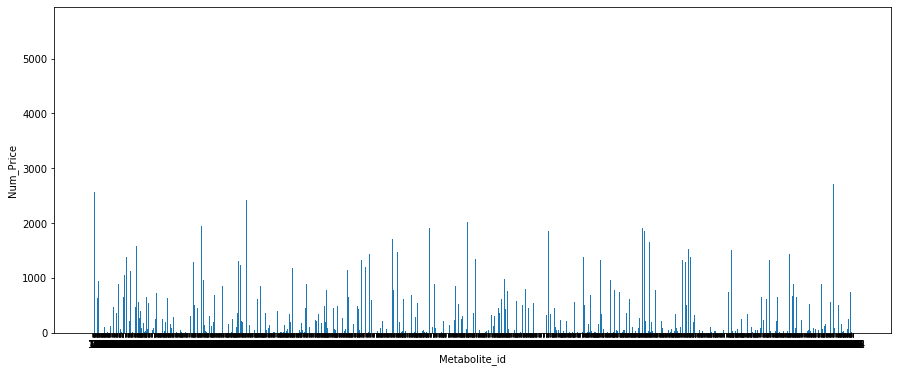

In [34]:
#Creating barplot of number of prices per metabolite

m_id = []
num_price = []
for k,g in df_clean.groupby('metab_id'):
    m_id.append(k)                               # Creating list with the metabolite ids
    num_price.append(g.shape[0])                 # Creating list with number of prices 
    
plt.figure(figsize=(15,6))                       # Change figure size, it should stay in this size so it's possible to see the bigger bar (senão não dá...)
plt.bar(m_id, num_price)                         # Create bar plot with the 2 lists created before
plt.xticks(m_id)
plt.xlabel('Metabolite_id')
plt.ylabel('Num_Price')
plt.show()

In [35]:
#Try to put the graph above with the x axis sorted by the y axis
price_met = {}                                                         
for k,g in df_clean.groupby('metab_id'):                                
    if k in price_met:
        print('There is a metabolite with more than one num_price.')
    elif k not in price_met:
        price_met[k] = g.shape[0]                                      #Create a dictionary with metabolite : num_prices

In [36]:
# Create list with tuples [(metab_id, num_price)]
import operator
sort_price_met = sorted(price_met.items(), key=operator.itemgetter(1), reverse = True)  
# The dictionary becomes a list of tuples

print(sort_price_met)  # This list of tuples is already sorte by the y value

[(187, 5662), (1175, 4652), (3743, 3403), (1159, 3378), (3122, 3376), (3519, 3302), (2300, 3077), (603, 2995), (1531, 2934), (1132, 2909), (2504, 2858), (3193, 2813), (3479, 2736), (4193, 2722), (2690, 2710), (1487, 2694), (3013, 2668), (2605, 2602), (1765, 2591), (13, 2577), (2020, 2542), (848, 2455), (2452, 2454), (2565, 2441), (2342, 2433), (3394, 2428), (433, 2422), (873, 2421), (323, 2408), (3532, 2403), (1442, 2401), (3080, 2262), (140, 2249), (1210, 2207), (3649, 2184), (1869, 2180), (2273, 2180), (2836, 2175), (557, 2147), (2710, 2092), (74, 2032), (2123, 2026), (2190, 2011), (1285, 2002), (2652, 1965), (300, 1964), (1632, 1963), (618, 1957), (1453, 1948), (1660, 1948), (524, 1945), (2446, 1935), (1499, 1921), (3113, 1921), (1908, 1915), (1152, 1912), (2054, 1893), (2678, 1890), (2581, 1857), (67, 1856), (3253, 1855), (3124, 1850), (3496, 1850), (902, 1830), (3975, 1810), (2618, 1803), (1068, 1802), (1986, 1801), (517, 1800), (2913, 1798), (802, 1734), (973, 1727), (1565, 1718)

In [37]:
# # Create a barplot with the x axis sorted by the y values

# plt.figure(figsize=(18,6))  # Para alterar o tamanho da figura, se ficar neste tamanho dá para ver a barra maior (senão não dá)
# plt.bar(range(len(sort_price_met)), [val[1] for val in sort_price_met], align='center')  
# plt.xticks(range(len(sort_price_met)), [val[0] for val in sort_price_met])
# plt.xticks(rotation=70)
# plt.show()

In [38]:
# Creating interactive barplot with plotly

data = go.Bar(x = list(range(len(sort_price_met))), y = [val[1] for val in sort_price_met], name = 'Num_Prices')

layout = go.Layout(title = go.layout.Title(
                        text = 'Number of Prices Per Metabolite'),
                   xaxis = go.layout.XAxis(
                        tickmode = 'array',
                        tickvals = list(range(len(sort_price_met))),
                        ticktext = [val[0] for val in sort_price_met],
                        title = 'Metabolite ID'),
                   yaxis = go.layout.YAxis( 
                        title = 'Number of Prices'))

#layout = go.Layout(barmode='overlay', title = 'Num_Prices_Per_Metabolite')
#layout = go.Layout(barmode='stack', title = 'Num_Prices_Per_Metabolite')  
#este é melhor para ver o numero total de preços de cada metabolito, ele acrescenta ao nº de preços de uma unidade o nº da outra unidade
                                                                    

fig = go.Figure(data  = data, layout = layout)
po.iplot(fig, show_link= False)    # to see here on jupyter
# po.plot(fig)                     # to see in a different separator

it's hard too understand the graph because there is a lot of metabolites. 
Maybe creating an histogram might be easier to observe the data.

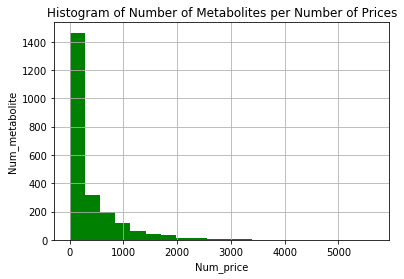

In [39]:
# Create an histogram num_prices per num_metabolites

plt.hist(num_price, 20, facecolor='g')
plt.xlabel('Num_price')
plt.ylabel('Num_metabolite')
plt.title('Histogram of Number of Metabolites per Number of Prices')
# plt.axis([0, 12000, 0, 2000])
plt.grid(True)
plt.show()

The histogram is right skewed, which means that the mean of the number of prices is typically greater than the median.

In [40]:
# Interactive histogram with plotly

fig = go.Figure(
      data=[go.Histogram(x= num_price, name = 'Num Price (g)', opacity = 0.8)]) #Creating histogram with num_price list

fig.update_layout(
    title_text='Histogram of Number of Metabolites per Number of Prices', # title of plot
    xaxis_title_text='Num_Price', # xaxis label
    yaxis_title_text='Num_Metabolite', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

In [41]:
#Calculate percentages

len_met = df_clean.metab_id.nunique() 

def percent_prices (less_than_number): # Create a function that gives the percentage of metabolites that have less than x prices
    print('How many metabolites have less than',less_than_number,'prices?')
    num_metab = 0
    for i in sort_price_met:
        if i[1] < less_than_number:
            num_metab += 1             # Every time de number of prices is lower than 2000 the num_metab adds 1

    print(num_metab*100/len_met,'% (',num_metab,'of', len_met,'metabolites) \n')

In [42]:
# Percentages of how many metabolites exist with less than x prices?

percent_prices(2000)
percent_prices(1000)
percent_prices(500)
percent_prices(200)
percent_prices(100)

How many metabolites have less than 2000 prices?
98.06848112379281 % ( 2234 of 2278 metabolites) 

How many metabolites have less than 1000 prices?
90.03511852502194 % ( 2051 of 2278 metabolites) 

How many metabolites have less than 500 prices?
75.54872695346795 % ( 1721 of 2278 metabolites) 

How many metabolites have less than 200 prices?
56.2774363476734 % ( 1282 of 2278 metabolites) 

How many metabolites have less than 100 prices?
43.459174714661984 % ( 990 of 2278 metabolites) 



**DÚVIDA:** Posso usar só metabolitos com menos de 2000 preços? Porque a maior parte dos metabolitos está praticamente nessa gama...é isso que devo retirar desta análise?

- **How many metabolites have prices for all the months??**  
**And 90% of the months?**  (by provider or not)

In [43]:
# Calculating how many metabolites have prices for **all** the months of the time window

dict_dates = {}                          # Create a dictionary that will have {metab_id : [(year,month)]}
t_window = []                            # Create a list of the months that include the time window
for k,g in df_clean.groupby(['metab_id','year','month'])['price_per_g']:  # group by metabolite id, year and month 
    k = list(k)                          # Turn to a list so the output is [metab_id, year, month]
#     print(len(g))
    num_p = len(g)                       # setting number of prices for each date and each met_id (for the future maybe)
    date = (k[1],k[2])                   # turn into a tuple as (year, month)
    if date not in t_window:
        t_window.append(date)    
    if k[0] in dict_dates:
        dict_dates[k[0]].append(date)
    elif k[0] not in dict_dates:
        dict_dates[k[0]] = [date]

        
# print(dict_dates)
# print(t_window)

num_met_all_month = 0                    # count the number of metabolites that have prices for all the months
met_all_month = []                       # list of the metabolites ids of those metabolites mentioned above
met_not_all_m = []                       # list of the metabolites ids that don't have prices for all the months
for id in dict_dates:                    
    if dict_dates[id] == t_window:       # comparing the two lists to see if they are equal!
        met_all_month.append(id)
        num_met_all_month += 1
    else: met_not_all_m.append(id)
        
               
print('Number of metabolites that have prices for all the months:', num_met_all_month, '\n')
# print('Metabolite Ids for the ones that have prices for all the months: \n', met_all_month, '\n')
print('Percentage:', num_met_all_month*100/len(m_id),'%', '(',num_met_all_month,'of',len(m_id),'metabolites) \n')


Number of metabolites that have prices for all the months: 506 

Percentage: 22.212467076382794 % ( 506 of 2278 metabolites) 



In [44]:
# met_not_all_m

In [45]:
# # Making sure there is no errors
# dict_dates[met_not_all_m[0]]   # it really is lacking the first month of 2018

In [46]:
# And for 90% of the months? 

num_met_90_month = 0                     # count the number of metabolites that have prices for 90% of the months
met_90_month = []                        # list of the metabolites ids of those metabolites mentioned above
met_not_90_m = []                        # list of the metabolites ids that don't have prices for 90% of the months
len_window = len(t_window)               # there are 18 months so the len will be 18
for id in dict_dates:
    len_id = len(dict_dates[id])        
    if all(date in t_window for date in dict_dates[id]):   # even if the metabolite doesn't have all the months they need to be contained on the t_window list
        if len_id/len_window >= 0.9:     # find the metabolites that have prices for 90% of the months by comparing the lens of the lists  
            met_90_month.append(id)
            num_met_90_month += 1
        else: met_not_90_m.append(id)

        
print('Number of metabolites that have prices for 90% of the months:', num_met_90_month, '\n')
# print('Metabolite Ids of the ones that have prices for 90% of the months: \n', met_90_month, '\n')
print('Percentage:', num_met_90_month*100/len(m_id),'%', '(', num_met_90_month,'of',len(m_id),'metabolites) \n')        

Number of metabolites that have prices for 90% of the months: 1361 

Percentage: 59.74539069359087 % ( 1361 of 2278 metabolites) 



In [47]:
# # Making sure there is no errors
# dict_dates[met_not_90_m[0]]   # it's definitely lesser than 90% of the months

**Question:** What do we do with the metabolites that don't have prices for 90% of the months? Do we filter them out?

- **How many metabolites by provider have prices for all the months??**
**And for 90% of the months?** 

(Isto pode não ter grande interesse mas vamos ver)

In [48]:
# Calculating how many metabolites have prices for **all** the months of the time window

dict_dates_grp = {}                          # Create a dictionary that will have {metab_id : [(year,month)]}
for k,g in df_clean.groupby(['metab_id', 'provider_name','year','month'])['price_per_g']:  # group by metabo id, prov_name, year and month 
    k = list(k)                          # Turn to a list so the output is [metab_id, provider_name, year, month]
#     print(len(g))
    num_p = len(g)                       # setting number of prices for each date and each met_id-prov_name(for the future maybe)
    date = (k[2],k[3])                   # turn into a tuple as (year, month)
    grp = (k[0],k[1])                    # turn into a tuple as (metab_id, prov_name)
    if grp in dict_dates_grp:
        dict_dates_grp[grp].append(date)
    elif grp not in dict_dates_grp:
        dict_dates_grp[grp] = [date]


num_all_groups = len(dict_dates_grp)
# print(dict_dates_grp)

num_grp_all_month = 0                    # count the number of metabolites that have prices for all the months
grp_all_month = []                       # list of the metabolites ids of those metabolites mentioned above
grp_not_all_m = []                       # list of the metabolites ids that don't have prices for all the months
for grp in dict_dates_grp:                    
    if dict_dates_grp[grp] == t_window:       # comparing the two lists to see if they are equal!
        grp_all_month.append(grp)
        num_grp_all_month += 1
    else: grp_not_all_m.append(grp)
        
               
print('Number of metabolite-provider groups that have prices for all the months:', num_grp_all_month, '\n')
# print('Metab-Provider groups of the ones that have prices for all the months: \n', grp_all_month, '\n')
print('Percentage:', num_grp_all_month*100/num_all_groups,'%', '(', num_grp_all_month,'of',num_all_groups,'metab-provider groups) \n')
# print('-----------------------------------------------------')
# print('Groups of the ones that don\'t have prices for all months:\n', grp_not_all_m,'\n')

Number of metabolite-provider groups that have prices for all the months: 2009 

Percentage: 8.164675282451435 % ( 2009 of 24606 metab-provider groups) 



In [49]:
# # Making sure there is no errors
# dict_dates_grp[grp_not_all_m[0]]  # does not have prices for 2019

In [50]:
# And for 90% of the months? 

num_grp_90_month = 0                     # count the number of groups that have prices for 90% of the months
grp_90_month = []                        # list of the groups of those mentioned above
grp_not_90_m = []                        # list of the groups that don't have prices for 90% of the months
len_window = len(t_window)               # there are 18 months so the len will be 18
for group in dict_dates_grp:
    len_grp = len(dict_dates_grp[group])        
    if all(date in t_window for date in dict_dates_grp[group]):   # even if the groups don't have all the months they need to be contained on the t_window list
        if len_grp/len_window >= 0.9:     # find the groups that have prices for 90% of the months by comparing the lens of the lists  
            grp_90_month.append(group)
            num_grp_90_month += 1
        else: grp_not_90_m.append(group)

        
print('Number of metab-provider groups that have prices for 90% of the months:', num_grp_90_month, '\n')
# print('Metabolite-Provider groups of the ones that have prices for 90% of the months: \n', grp_90_month, '\n')
print('Percentage:', num_grp_90_month*100/num_all_groups,'%', '(', num_grp_90_month,'of',num_all_groups,'metab-provider groups) \n')        
# print('-----------------------------------------------------')
# print('Metabolite-Provider groups of the ones that don\'t have prices for 90% of the months:\n', grp_not_90_m,'\n')

Number of metab-provider groups that have prices for 90% of the months: 5264 

Percentage: 21.39315614077867 % ( 5264 of 24606 metab-provider groups) 



**Question:** I don't even know how are these percentages needed for the work, but I'll leave them here.
Can we use only the groups that have 90% of months with prices??

- **How many providers have prices for all the months??**
**And for 90% of the months?** (regardless of the metabolite)

And what about the providers?? Are they consistently lacking prices for several months independently of the metabolite?

In [51]:
# Calculating how many providers have prices for **all** the months of the time window

dict_dates_prov = {}                     # Create a dictionary that will have {prov_name : [(year,month)]}
for k,g in df_clean.groupby(['provider_name','year','month'])['price_per_g']:  # group by provider_name, year and month 
    k = list(k)                          # Turn to a list so the output is [prov_name, year, month]
#     print(k)
#     print(g)
    num_p = len(g)                       # setting number of prices for each date and each prov_name (for the future maybe)
    date = (k[1],k[2])                   # turn into a tuple as (year, month)      
    if k[0] in dict_dates_prov:
        dict_dates_prov[k[0]].append(date)
    elif k[0] not in dict_dates_prov:
        dict_dates_prov[k[0]] = [date]

        
num_all_providers = len(dict_dates_prov)
# print(dict_dates_prov)

num_prov_all_month = 0                    # count the number of providers that have prices for all the months
prov_all_month = []                       # list of the providers names of those metabolites mentioned above
prov_not_all_m = []                       # list of the providers names that don't have prices for all the months
for name in dict_dates_prov:                    
    if dict_dates_prov[name] == t_window:       # comparing the two lists to see if they are equal!
        prov_all_month.append(name)
        num_prov_all_month += 1
    else: prov_not_all_m.append(name)
        
               
print('Number of providers that have prices for all the months:', num_prov_all_month, '\n')
print('Providers names of the ones that have prices for all the months: \n', prov_all_month, '\n')
print('Percentage:', num_prov_all_month*100/num_all_providers,'%', '(', num_prov_all_month,'of',num_all_providers,'providers) \n')
print('-----------------------------------------------------')
print('Providers names of the ones that don\'t have prices for all months:\n', prov_not_all_m,'\n')

Number of providers that have prices for all the months: 67 

Providers names of the ones that have prices for all the months: 
 ['ACINTS', 'ACS Scientific Inc', 'AK Scientific', 'AK Scientific Inc.', 'AK Scientific, Inc.', 'AOBChem USA', 'Abamachem Ltd', 'Accela ChemBio Inc.', 'Advamacs', 'Aldlab', 'Alichem', 'Alinda Balt', 'AnalytiCon Discovery, GmbH', 'Angene', 'Angene International Limited', 'Apollo Scientific', 'Aronis', 'Axon Medchem', 'BIOTREND Chemicals, AG', 'BioBlocks', 'Biosynth AG', 'Cayman Europe', 'Chem4Pharma', 'ChemBridge Corp.', 'ChemBridge Corporation', 'ChemDiv, Inc.', 'ChemFaces', 'ChemShuttle', 'Curpys Chemicals', 'EDASA Scientific', 'ENAMINE Ltd.', 'Enamine Ltd Chemspace partner', 'Eximed', 'FCH Group', 'FCH Group Chemspace partner', 'Fluorochem', 'Fluorochem Limited', 'HTS Biochemie Innovationen', 'Intermed Ltd', 'Key Organics, Ltd.', 'Labseeker', 'Life Chemicals Inc.', 'Manchester Organics', 'Manchester Organics Limited', 'Maybridge, Ltd.', 'Otava, Ltd.', 'Otava

In [52]:
# # Making sure there is no errors
# dict_dates_prov[prov_not_all_m[0]]   

In [53]:
# And for 90% of the months? 

num_prov_90_month = 0                     # count the number of providers that have prices for at least 90% of the months
prov_90_month = []                        # list of the providers names of those providers mentioned above
prov_not_90_m = []                        # list of the providers names that don't have prices for 90% of the months
len_window = len(t_window)                # there are 18 months so the len will be 18
for name in dict_dates_prov:
    len_name = len(dict_dates_prov[name])        
    if all(date in t_window for date in dict_dates_prov[name]):   # even if the providers doesn't have all the months they need to be contained on the t_window list
        if len_name/len_window >= 0.9:     # find the providers that have prices for 90% of the months by comparing the lens of the lists  
            prov_90_month.append(name)
            num_prov_90_month += 1
        else: prov_not_90_m.append(name)

        
print('Number of providers that have prices for 90% of the months:', num_prov_90_month, '\n')
print('Providers names of the ones that have prices for 90% of the months: \n', prov_90_month, '\n')
print('Percentage:', num_prov_90_month*100/num_all_providers,'%', '(', num_prov_90_month,'of',num_all_providers,'providers) \n')        
print('-----------------------------------------------------')
print('Providers names of the ones that don\'t have prices for 90% of the months:\n', prov_not_90_m,'\n')

Number of providers that have prices for 90% of the months: 72 

Providers names of the ones that have prices for 90% of the months: 
 ['ACINTS', 'ACS Scientific Inc', 'AK Scientific', 'AK Scientific Inc.', 'AK Scientific, Inc.', 'AKL Research LLP', 'AOBChem USA', 'Abamachem Ltd', 'Accela ChemBio Inc.', 'Advamacs', 'Aldlab', 'Alichem', 'Alinda Balt', 'AnalytiCon Discovery, GmbH', 'Angene', 'Angene International Limited', 'Apollo Scientific', 'Aronis', 'Axon Medchem', 'BIOTREND Chemicals, AG', 'BioBlocks', 'Biosynth AG', 'Cayman Europe', 'Chem4Pharma', 'ChemBridge Corp.', 'ChemBridge Corporation', 'ChemDiv, Inc.', 'ChemFaces', 'ChemShuttle', 'Curpys Chemicals', 'Debye Scientific', 'EDASA Scientific', 'ENAMINE Ltd.', 'Enamine Ltd Chemspace partner', 'EvoBlocks, Ltd.', 'Eximed', 'FCH Group', 'FCH Group Chemspace partner', 'Fluorochem', 'Fluorochem Limited', 'HTS Biochemie Innovationen', 'Intermed Ltd', 'Key Organics, Ltd.', 'Labseeker', 'LeadGen Labs', 'Life Chemicals Inc.', 'Manchester O

In [54]:
# # Making sure there is no errors
# dict_dates_prov[prov_not_90_m[0]]   

**Question:** What do we do with the providers that don't have prices for 90% of the months consistently? Do we filter them out?

In [55]:
df_clean

,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-11 21:39:13,1,tobramycin,158.0,1.0,g,ACC Corporation,CHEMSPACE,158.000,158.00,2018,1
2018-01-11 21:39:13,1,tobramycin,48.6,100.0,mg,AK Scientific Inc.,CHEMSPACE,0.486,486.00,2018,1
2018-01-11 21:39:13,1,tobramycin,30.0,1.0,g,AK Scientific Inc.,CHEMSPACE,30.000,30.00,2018,1
2018-01-11 21:39:13,1,tobramycin,69.9,1.0,g,AK Scientific Inc.,CHEMSPACE,69.900,69.90,2018,1
2018-01-11 21:39:13,1,tobramycin,149.5,1.0,g,AK Scientific Inc.,CHEMSPACE,149.500,149.50,2018,1
2018-01-11 21:39:13,1,tobramycin,100.0,5.0,g,AK Scientific Inc.,CHEMSPACE,20.000,20.00,2018,1
2018-01-11 21:39:13,1,tobramycin,195.0,5.0,g,AK Scientific Inc.,CHEMSPACE,39.000,39.00,2018,1
2018-01-11 21:39:13,1,tobramycin,360.0,25.0,g,AK Scientific Inc.,CHEMSPACE,14.400,14.40,2018,1
2018-01-11 21:39:13,1,tobramycin,576.0,25.0,g,AK Scientific Inc.,CHEMSPACE,23.040,23.04,2018,1


# **CASE STUDIES** 
(ts, boxplot)

Como só podemos fazer uma análise por metabolito, vou escolher o **metabolito 1175** porque é o segundo metabolito com mais preços e o que tem mais providers. **Será o meu caso de estudo.** No entanto, outros casos de estudo possíveis para além dos metabolitos com maior nº de preços e de providers, são os metabolitos com menor variância por mês/ano.

Para além disso, este é o único metabolito desta base de dados com esses dados, não existem duplicados. É preciso ter cuidado com isto porque *se houver duplicados é preciso usar a dataframe atualizada*.

In [56]:
df_caseStud = df_clean[df_clean.metab_id == 1175]                  #filtrar o dataframe para apenas o metabolito 1175

In [57]:
df_caseStud

,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:15,1175,4-aminopyridine,55.00,1.0,mg,ENAMINE Ltd.,MolPort,55.000000,55000.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,56.00,2.0,mg,ENAMINE Ltd.,MolPort,28.000000,28000.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,59.00,5.0,mg,ENAMINE Ltd.,MolPort,11.800000,11800.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,78.00,10.0,mg,ENAMINE Ltd.,MolPort,7.800000,7800.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,85.00,15.0,mg,ENAMINE Ltd.,MolPort,5.666667,5666.666667,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,93.00,20.0,mg,ENAMINE Ltd.,MolPort,4.650000,4650.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,100.00,25.0,mg,ENAMINE Ltd.,MolPort,4.000000,4000.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,108.00,30.0,mg,ENAMINE Ltd.,MolPort,3.600000,3600.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,116.00,35.0,mg,ENAMINE Ltd.,MolPort,3.314286,3314.285714,2018,1


In [58]:
# Number of prices for metabolite X
df_caseStud.shape[0]

4652

In [59]:
# Verify if dataframe as only mass units 
df_caseStud.unit.unique()

array(['mg', 'g', 'kg'], dtype=object)

In [60]:
# How many different providers this metabolite has?
df_caseStud.provider_name.nunique()

67

In [63]:
# How many different sources this metabolite has? 
df_caseStud.source.unique()

array(['MolPort', 'CHEMSPACE', 'OXChem'], dtype=object)

This metabolite, 4-aminopyridine (id = 1175), has **4652 prices**, counting already only the ones with **mass units** and **without duplicated prices**. Besides, this metabolite has **67 providers** and only **3 sources** (which may be good).

### Time Series Plots 

In [64]:
#Time series of all the prices for the mass units and between this time window
#Creating a time plot where the months are not distinguished

df_caseStud = df_caseStud.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of 4-aminopyridine (price/g)',
    yaxis = dict(
        title = 'Price(USD)'
    ),
    xaxis = dict(
        title = 'Date'
    )
)

prov_list = []
for key, item in df_caseStud.groupby(['provider_name'])['price_per_g']:
    prov_list.append(key)
    
    
d_x = {}
d_y = {}
for k,g in df_caseStud.groupby(['provider_name'])['price_per_g']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    elif k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
    data = []
    for s in signals:
        trace1 = go.Scatter(
            x = d_x[s],
            y = d_y[s],
            mode = 'lines + markers',
            name = 'Provider {}'.format(s),
            line = dict(
                shape = 'spline' #smooth line
           )
       )
        data.append(trace1)
    
    fig = go.Figure(data = data, layout= layout)
    po.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('AA BLOCKS', 'ACC Corporation', 'AD Chem…

In [65]:
# Find min and max price values in this dataframe
print('Minimum price value on df_caseStud: ', min(df_caseStud.price_per_g))
print('Maximum price value on df_caseStud: ',max(df_caseStud.price_per_g))

Minimum price value on df_caseStud:  0.27735000000000004
Maximum price value on df_caseStud:  66880.0


## Boxplot with all prices (g,mg,kg)
See which provider has variation through time

In [66]:
# Create boxplot with prices per month and ** per provider**!!
# Create plot with plotly

df_caseStud = df_caseStud.sort_index()


layout = go.Layout(
    title = 'Boxplot of 4-aminopyridine Prices per Month and per Provider (g, kg, mg)',
    yaxis = dict(
        title = 'Price (USD)'
    ),
    xaxis = dict(
        title = 'Month'
    )
)

#dicionário com os meses todos para poder substituir o número pela palavra
dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

#valores para a opção all_providers
all_p = []    
for k,g in df_caseStud.groupby(['year','month'])['price_per_g']:     # só se agrupa por mês e ano
    k = list(k)                                                # o mês e o ano têm de ficar como lista
    k[1] = dict_month[k[1]]                                    # substituir o nº do mês pela palavra
    date = k[1] +' '+ str(k[0])                                # criar a string date que vai ficar no x axis
    y = g.values                                           
    for i in y:                                                # colocar numa lista cada valor com a respectiva data      
        all_p.append([date, i])

dict_boxplot = {} #Fazer um dicionário onde os values são listas de listas (ex., [date, valor])
          
dict_boxplot['all_providers'] = all_p                          # colocar os valores de all_providers no dicionário
for k,g in df_caseStud.groupby(['year','month', 'provider_name'])['price_per_g']:  # agrupar por mês, ano e provider
    k = list(k)                                                # mês, ano e provider têm de ficar como lista para ser mais fácil usar
    k[1] = dict_month[k[1]]                                                        
    date = k[1] +' '+ str(k[0]) 
    y = g.values
    values =[]                                                 # criar lista onde vão ficar as listas 
    for i in y:
        values.append([date, i])                               # pôr na lista uma lista com um dos valores e a respectiva data
#     print(values)
    if k[2] in dict_boxplot:
        dict_boxplot[k[2]].extend(values)                       # se já existir extender a lista existente com outras listas
    elif k[2] not in dict_boxplot:
        dict_boxplot[k[2]] = values                            # colocar no dicionário o provider e a respectiva lista de listas

# print(dict_boxplot)        


list_options=[]                                                # criar uma lista que tenha todos os provviders + all_providers    
for p in dict_boxplot:                                         # para poder usar como opção
    list_options.append(p)

# list_options.sort(key=str.lower)    
        
# print(len(list_options))  #dá certinho com o número de providers que este metabolito tem + a opção de todos os providers    
    
def update_plot(signals):#, freq):
    data1 = []
    for s in signals:
        trace1 = go.Box(
            y = [values[1] for values in dict_boxplot[s]],     # criar gigante lista só com os valores de y (usar valores nas listas da lista)
            x = [values[0] for values in dict_boxplot[s]],     # criar gigante lista com as datas respectivas para cada y
            name =  '{}'.format(s),
            boxpoints= 'all',                             # 'outliers' assim mostra só os outliers #all mostra tudo
            boxmean=True                                       # show mean
        )
    
        data1.append(trace1)
      
    fig = go.Figure(data = data1, layout= layout)
    po.iplot(fig)
    

signals = widgets.SelectMultiple(options = list_options, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('all_providers', 'ACC Corporation', 'AD …

There are boxplots that stay **the same througout the time, that's boring!**

Try to find providers that vary and see what's the cause for this situation.

- Use the ENAMINE, Ltd. -> this one has some variation however is through phases, there are four distinct phases.

In [67]:
# Find which providers have variation throughout the time

all_dates = {}                                              # Create dict for all dates in this metabolite {prov:[dates]}
for prov in dict_boxplot:
    l_date = [value[0] for value in dict_boxplot[prov]]     # find the all dates in this provider (dates will be repeated various times)
#     print(list(set(l_date)))
#     l_date = list(set(l_date))
    l_date_sort = []
    for date in l_date:
        if date not in l_date_sort:
            l_date_sort.append(date)     
    if prov in all_dates:
        print('**ERROR**: There are two equal providers (keys) in dictionary!')
    elif prov not in all_dates:
        all_dates[prov] = l_date_sort

# print(all_dates)
          
prov_variation = []                                         # Create list of providers that have variation 
prov_not_var = []                                           # Create list of providers that don't have variation
num_prov = 0
for prov in dict_boxplot:
    if prov != 'all_providers':
        num_prov += 1
        list_avg = {}                                       # Create dict {date: avg}
        for date in all_dates[prov]:
#             print(date)
            avg = 0
            soma = 0  
            count = 0
            for value in dict_boxplot[prov]:
#                 print(prov, value)
                if value[0] == date:
                    count += 1
                    soma += value[1]
#                 print(count, soma)
            avg = soma/count
            avg = round(avg, 5)                              # I rounded the average to 5 digits because after that even if it's different there is no differance in reality 
#             print('avg', avg)
            if date in list_avg:
                print('There is more than 1 date in this dictionary.')
            elif date not in list_avg:
                list_avg[date] = avg 
#             print(list_avg)
#         print(prov, list_avg)
        avg_date = [list_avg[date] for date in list_avg]     # Create a list of avg's of this prov to see if they differ
#         print(prov, avg_date)
        if all(avg_date == avg_date[0]):
            prov_not_var.append(prov)
        else: prov_variation.append(prov)

                
print('All providers that vary throughout the time: \n {} \n ({} of {}) \n\n'.format(prov_variation,len(prov_variation), num_prov))
print('All providers that don\'t vary throughout the time: \n {} \n ({} of {}) \n\n'.format(prov_not_var,len(prov_not_var), num_prov))                
            
            

All providers that vary throughout the time: 
 ['AK Scientific, Inc.', 'Accela ChemBio Inc.', 'Angene', 'Angene International Limited', 'Ark Pharm, Inc.', 'Astatech Inc', 'BIONET/Key Organics Ltd.', 'Bide Pharmatech Ltd.', 'Cayman Europe', 'Curpys Chemicals', 'ENAMINE Ltd.', 'Enamine Ltd Chemspace partner', 'FCH Group Chemspace partner', 'Fluorochem Limited', 'HTS Biochemie Innovationen', 'Labseeker', 'Life Chemicals Inc.', 'Manchester Organics', 'Specs', 'StruChem CO., LTD', 'SynQuest Laboratories, Inc.', 'Tocris Bioscience', 'UORSY Chemspace partner', 'UkrOrgSynthesis', 'Vitas-M Laboratory, Ltd.', 'BIONET - Key Organics Ltd.', 'BLD Pharmatech Ltd.', 'Selleck Chemicals LLC', 'BLD PHARMATECH LTD', 'Alichem', 'Ambeed, Inc.', 'Angene (China)', 'MedChemExpress Europe'] 
 (33 of 67) 


All providers that don't vary throughout the time: 
 ['ACC Corporation', 'AD Chemical Inc.', 'AK Scientific Inc.', 'AOBChem USA', 'Acadechem Co., Ltd', 'Aldlab', 'Aldlab Chemicals LLC', 'Alinda Chemical, Ltd

In some providers the prices stay constant throught the time and with a great difference between them, almost oscilating as we first saw with the time series. 

**Is this caused by different sources?** Maybe the prices are very different because they are retrieved from different sources but throughout the time those sources still provide the same prices.

NOTE: Take into account that the prices are retrivied monthly!!

In [68]:
# See how many sources there is in this provider that doesn't vary
df_caseStud[df_caseStud.provider_name == 'ACC Corporation'].source.unique()
#df_caseStud[df_caseStud.provider_name == 'ChemShuttle'].source.unique()

array(['CHEMSPACE'], dtype=object)

With this simple line of code, we conclude that the possible reason explained above is bullshit... we need to understand why the prices don't vary throughout the time.

In [70]:
# Try to find something that explains why the prices keep being constant
# df_caseStud[df_caseStud.provider_name == prov_not_var[0]]

df_caseStud[df_caseStud.provider_name == 'ChemShuttle']

,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:20,1175,4-aminopyridine,40.0,25.0,g,ChemShuttle,CHEMSPACE,1.60,1.60,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,45.0,5.0,g,ChemShuttle,CHEMSPACE,9.00,9.00,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,123.0,25.0,g,ChemShuttle,CHEMSPACE,4.92,4.92,2018,1
2018-02-10 11:41:22,1175,4-aminopyridine,40.0,25.0,g,ChemShuttle,CHEMSPACE,1.60,1.60,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,45.0,5.0,g,ChemShuttle,CHEMSPACE,9.00,9.00,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,123.0,25.0,g,ChemShuttle,CHEMSPACE,4.92,4.92,2018,2
2018-03-10 11:43:03,1175,4-aminopyridine,40.0,25.0,g,ChemShuttle,CHEMSPACE,1.60,1.60,2018,3
2018-03-10 11:43:04,1175,4-aminopyridine,45.0,5.0,g,ChemShuttle,CHEMSPACE,9.00,9.00,2018,3
2018-03-10 11:43:04,1175,4-aminopyridine,123.0,25.0,g,ChemShuttle,CHEMSPACE,4.92,4.92,2018,3


This prices don't vary throughout the time, but have different ranges since they are **related to different ammounts of metabolite (100g, 1g, 5g, 25g)**.

If we choose just one of these configurations the prices should become just one and stay constant but ...**constant prices are boring!**

### The providers that vary are more interesting!

In [71]:
# Create boxplot with prices per month and ** per provider**!! ---- JUST PROVIDERS THAT VARY
# Create plot with plotly

df_caseStud = df_caseStud.sort_index()


layout = go.Layout(
    title = 'Boxplot of 4-aminopyridine Prices per Month and per Provider (just the ones who vary)',
    yaxis = dict(
        title = 'Price (USD)'
    ),
    xaxis = dict(
        title = 'Month'
    )
)

#dicionário com os meses todos para poder substituir o número pela palavra
dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

#valores para a opção all_providers
all_p = []    
for k,g in df_caseStud.groupby(['year','month'])['price_per_g']:     # só se agrupa por mês e ano
    k = list(k)                                                # o mês e o ano têm de ficar como lista
    k[1] = dict_month[k[1]]                                    # substituir o nº do mês pela palavra
    date = k[1] +' '+ str(k[0])                                # criar a string date que vai ficar no x axis
    y = g.values                                           
    for i in y:                                                # colocar numa lista cada valor com a respectiva data      
        all_p.append([date, i])

dict_boxplot = {} #Fazer um dicionário onde os values são listas de listas (ex., [date, valor])
          
dict_boxplot['all_providers'] = all_p                          # colocar os valores de all_providers no dicionário
for k,g in df_caseStud.groupby(['year','month', 'provider_name'])['price_per_g']:  # agrupar por mês, ano e provider
    k = list(k)                                                # mês, ano e provider têm de ficar como lista para ser mais fácil usar
    k[1] = dict_month[k[1]]                                                        
    date = k[1] +' '+ str(k[0]) 
    y = g.values
    values =[]                                                 # criar lista onde vão ficar as listas 
    for i in y:
        values.append([date, i])                               # pôr na lista uma lista com um dos valores e a respectiva data
#     print(values)
    if k[2] in dict_boxplot:
        dict_boxplot[k[2]].extend(values)                       # se já existir extender a lista existente com outras listas
    elif k[2] not in dict_boxplot:
        dict_boxplot[k[2]] = values                            # colocar no dicionário o provider e a respectiva lista de listas

# print(dict_boxplot)        


list_options = prov_variation                                  # List of providers will be the providers that only vary

# list_options.sort(key=str.lower)    
        
# print(len(list_options))  #dá certinho com o número de providers que este metabolito tem + a opção de todos os providers    
    
def update_plot(signals):#, freq):
    data1 = []
    for s in signals:
        trace1 = go.Box(
            y = [values[1] for values in dict_boxplot[s]],     # criar gigante lista só com os valores de y (usar valores nas listas da lista)
            x = [values[0] for values in dict_boxplot[s]],     # criar gigante lista com as datas respectivas para cada y
            name =  '{}'.format(s),
            boxpoints= 'all',                                  # 'outliers' assim mostra só os outliers
            boxmean=True                                       # show mean
        )
    
        data1.append(trace1)
      
    fig = go.Figure(data = data1, layout= layout)
    po.iplot(fig)
    

signals = widgets.SelectMultiple(options = list_options, description = 'Date')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Date', options=('AK Scientific, Inc.', 'Accela ChemBio Inc.'…

**Why do this prices vary in phases??**

In [72]:
# See if it's because of the source,
df_caseStud[df_caseStud.provider_name == 'ENAMINE Ltd.'].source.unique()

array(['MolPort'], dtype=object)

In [73]:
# If it's not because of the source, what is happening in these different periods?

df_caseStud[df_caseStud.provider_name == 'ENAMINE Ltd.']


,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:15,1175,4-aminopyridine,55.0,1.0,mg,ENAMINE Ltd.,MolPort,55.000000,55000.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,56.0,2.0,mg,ENAMINE Ltd.,MolPort,28.000000,28000.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,59.0,5.0,mg,ENAMINE Ltd.,MolPort,11.800000,11800.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,78.0,10.0,mg,ENAMINE Ltd.,MolPort,7.800000,7800.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,85.0,15.0,mg,ENAMINE Ltd.,MolPort,5.666667,5666.666667,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,93.0,20.0,mg,ENAMINE Ltd.,MolPort,4.650000,4650.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,100.0,25.0,mg,ENAMINE Ltd.,MolPort,4.000000,4000.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,108.0,30.0,mg,ENAMINE Ltd.,MolPort,3.600000,3600.000000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,116.0,35.0,mg,ENAMINE Ltd.,MolPort,3.314286,3314.285714,2018,1


## Boxplot per unit

In [85]:
# Create boxplot with prices per unit
# Create plot with plotly

df_caseStud = df_caseStud.sort_index()


layout = go.Layout(
    title = 'Boxplot of Prices per Unit',
    yaxis = dict(
        title = 'Price (USD)'
    ),
    xaxis = dict(
        title = 'Unit'
    )
)

values = []                                               # create list with tuples [(unit, price)]
for k,g in df_caseStud.groupby(['unit'])['price']:
    y = g.values
    for price in y:
        t = (k, price)
        values.append(t)

# print(values)
        

trace = go.Box(
    y = [tup[1] for tup in values],
    x = [tup[0] for tup in values],
    boxpoints='all',
    boxmean=True                                          # show mean
    )



fig = go.Figure(data = trace, layout= layout)
po.iplot(fig)
        


In [86]:
# Which configuration (amount,unit) happens the most in this metabolite?

max_conf = {}                                                # create dictionary {'amount unit':num_prices}
for k,g in df_caseStud.groupby(['amount','unit'])['price']:                                                  
    conf = str(k[0])
    k = conf +' '+ k[1]                                      # k is now a string with the amount and unit
    num = len(g)                                             # num is the number of prices in that amount and unit
    if k in max_conf:
        max_conf[k] += num
    elif k not in max_conf:
        max_conf[k] = num
    


sorted_dict = sorted(
                     max_conf.items(), 
                     key=operator.itemgetter(1), 
                     reverse = True
                    )  #generates a list of tuples (key,value) of dictionary where list is sorted by the value
                                                                                    
print('Most common configuration in this metabolite: {} ({} prices)'.format(sorted_dict[0][0],sorted_dict[0][1]))




Most common configuration in this metabolite: 25.0 g (542 prices)


In [87]:
# Limiting the dataframe to just prices with 25 g 

amount_c, unit_c = sorted_dict[0][0].split()               # set as parameters the result given above
amount_c = np.float64(amount_c)                            # turn amount as a float

df_caseStud = df_caseStud[(df_caseStud.amount == amount_c) & (df_caseStud.unit == unit_c)]
df_caseStud


,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:15,1175,4-aminopyridine,53.75,25.0,g,Cayman Europe,MolPort,2.1500,2.1500,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,25.00,25.0,g,"AK Scientific, Inc.",MolPort,1.0000,1.0000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,20.85,25.0,g,Fluorochem Limited,MolPort,0.8340,0.8340,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,40.00,25.0,g,Aldlab,MolPort,1.6000,1.6000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,138.00,25.0,g,Angene,MolPort,5.5200,5.5200,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,100.00,25.0,g,"AK Scientific, Inc.",MolPort,4.0000,4.0000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,50.00,25.0,g,"Ark Pharm, Inc.",MolPort,2.0000,2.0000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,102.86,25.0,g,Fluorochem Limited,MolPort,4.1144,4.1144,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,90.00,25.0,g,Oxchem Corporation,MolPort,3.6000,3.6000,2018,1


#### Boxplot of prices per month 

In [88]:
for k,g in df_caseStud.groupby(['year','month'])['price_per_g']:
    print(list(k))
    print(g)

[2018, 1]
date
2018-01-10 11:35:15     2.1500
2018-01-10 11:35:15     1.0000
2018-01-10 11:35:15     0.8340
2018-01-10 11:35:15     1.6000
2018-01-10 11:35:15     5.5200
2018-01-10 11:35:17     4.0000
2018-01-10 11:35:17     2.0000
2018-01-10 11:35:17     4.1144
2018-01-10 11:35:17     3.6000
2018-01-10 11:35:17     2.0000
2018-01-10 11:35:17    20.2400
2018-01-10 11:35:17     5.4000
2018-01-10 11:35:20     0.8000
2018-01-10 11:35:20     0.8000
2018-01-10 11:35:20     0.8000
2018-01-10 11:35:20     1.0000
2018-01-10 11:35:20     1.6000
2018-01-10 11:35:20     7.0000
2018-01-10 11:35:20     1.6000
2018-01-10 11:35:20     3.8000
2018-01-10 11:35:22     0.8000
2018-01-10 11:35:22     0.8000
2018-01-10 11:35:22     0.8000
2018-01-10 11:35:22     3.7600
2018-01-10 11:35:22    52.9056
2018-01-10 11:35:22     3.2000
2018-01-10 11:35:22     3.2400
2018-01-10 11:35:22     3.2000
2018-01-10 11:35:22     4.0000
2018-01-10 11:35:22     8.3200
2018-01-10 11:35:22     3.4000
2018-01-10 11:35:22     

In [89]:
# # Create boxplot with prices per month
# # Create plot with plotly

# df_caseStud = df_caseStud.sort_index()


# layout = go.Layout(
#     title = 'Boxplot of Methane Prices per Month',
#     yaxis = dict(
#         title = 'Price (USD)'
#     ),
#     xaxis = dict(
#         title = 'Month'
#     )
# )


# dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    
# month_list = []
# d_y = {}
# for k,g in df_caseStud.groupby(['year','month'])['price_per_g']:
#     k = list(k)
#     k[1] = dict_month[k[1]]
#     k = k[1] +' '+ str(k[0])
#     month_list.append(k)
# # print(month_list)
#     y = g.values
#     if k not in d_y:
#         d_y[k] = y
#     elif k in d_y:
#         d_y[k].append(y)
#     else: print('There is a key lacking on the y dict.')


# def update_plot(signals):#, freq):
#     data1 = []
#     for s in signals:
#         trace1 = go.Box(
#             y = d_y[s],
#             name =  '{}'.format(s),
#             boxpoints='outliers',
#             boxmean=True                                       # show mean
#         )
    
#         data1.append(trace1)
      
#     fig = go.Figure(data = data1, layout= layout)
#     po.iplot(fig)
    
# # data = []
# # for s in month_list:
# #     trace1 = go.Box(
# #         y = d_y[s],
# #         name = '{}'.format(s),
# #         boxpoints='outliers'
# #     )

# #     data.append(trace1)


# signals = widgets.SelectMultiple(options = month_list, description = 'Date')
# #freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
# widgets.interactive(update_plot, signals = signals)#, freq = freq)


Como podemos ver a variância não muda muito entre os diferentes boxplots de cada mês!  -- **Isto foi antes de tirar os duplicados**

Depois de tirar duplicados:
**??** Não sei se uma diferença de quase 2 USD é muito grande... variância?

Isto é apenas o boxplot de todos os preços deste metabolito, agrupados por mês! Eu quero agora tentar juntar neste boxplot graph os boxplots para os preços de cada provider.

#### Boxplot of prices per month and provider

In [90]:
# Create boxplot with prices per month and ** per provider**!!
# Create plot with plotly

df_caseStud = df_caseStud.sort_index()


layout = go.Layout(
    title = 'Boxplot of 4-aminopyridine Prices per Month and per Provider (25g)',
    yaxis = dict(
        title = 'Price (USD)'
    ),
    xaxis = dict(
        title = 'Month'
    )
)

#dicionário com os meses todos para poder substituir o número pela palavra
dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

#valores para a opção all_providers
all_p = []    
for k,g in df_caseStud.groupby(['year','month'])['price_per_g']:     # só se agrupa por mês e ano
    k = list(k)                                                # o mês e o ano têm de ficar como lista
    k[1] = dict_month[k[1]]                                    # substituir o nº do mês pela palavra
    date = k[1] +' '+ str(k[0])                                # criar a string date que vai ficar no x axis
    y = g.values                                           
    for i in y:                                                # colocar numa lista cada valor com a respectiva data      
        all_p.append([date, i])

dict_boxplot = {} #Fazer um dicionário onde os values são listas de listas (ex., [date, valor])
          
dict_boxplot['all_providers'] = all_p                          # colocar os valores de all_providers no dicionário
for k,g in df_caseStud.groupby(['year','month', 'provider_name'])['price_per_g']:  # agrupar por mês, ano e provider
    k = list(k)                                                # mês, ano e provider têm de ficar como lista para ser mais fácil usar
    k[1] = dict_month[k[1]]                                                        
    date = k[1] +' '+ str(k[0]) 
    y = g.values
    values =[]                                                 # criar lista onde vão ficar as listas 
    for i in y:
        values.append([date, i])                               # pôr na lista uma lista com um dos valores e a respectiva data
#     print(values)
    if k[2] in dict_boxplot:
        dict_boxplot[k[2]].extend(values)                       # se já existir extender a lista existente com outras listas
    elif k[2] not in dict_boxplot:
        dict_boxplot[k[2]] = values                            # colocar no dicionário o provider e a respectiva lista de listas
    

# print(dict_boxplot)        


list_options=[]                                                # criar uma lista que tenha todos os provviders + all_providers    
for p in dict_boxplot:                                         # para poder usar como opção
    list_options.append(p)

# list_options.sort(key=str.lower)    
        
# print(len(list_options))  #dá certinho com o número de providers que este metabolito tem + a opção de todos os providers    
    
def update_plot(signals):#, freq):
    data1 = []
    for s in signals:
        trace1 = go.Box(
            y = [values[1] for values in dict_boxplot[s]],     # criar gigante lista só com os valores de y (usar valores nas listas da lista)
            x = [values[0] for values in dict_boxplot[s]],     # criar gigante lista com as datas respectivas para cada y
            name =  '{}'.format(s),
            boxpoints= 'all',                                  # 'outliers' assim mostra só os outliers
            boxmean=True                                       # show mean
        )
    
        data1.append(trace1)
      
    fig = go.Figure(data = data1, layout= layout)
    po.iplot(fig)
    

signals = widgets.SelectMultiple(options = list_options, description = 'Date')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Date', options=('all_providers', 'ACC Corporation', 'AD Chem…

Relative to the ACC Corporation provider, as discussed above, the oscilation really stopped and now there is only one price per month and it's constant. So it's boring!  

We'll now understand the other part of the spectrum. **Why do some providers vary throughout the time even though there is only one configuration now?**

In [91]:
# Understand why prices vary throughout the time and other don't
df_caseStud[df_caseStud.provider_name == 'AK Scientific, Inc.'].source.unique()

array(['MolPort'], dtype=object)

This provider **(AK Scientific, Inc.) does vary**, but it's not because of the source. That reason is filtered out.

In [92]:
df_caseStud[df_caseStud.provider_name == 'AK Scientific, Inc.']

,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:15,1175,4-aminopyridine,25.0,25.0,g,"AK Scientific, Inc.",MolPort,1.00,1.00,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,100.0,25.0,g,"AK Scientific, Inc.",MolPort,4.00,4.00,2018,1
2018-02-10 11:41:18,1175,4-aminopyridine,25.0,25.0,g,"AK Scientific, Inc.",MolPort,1.00,1.00,2018,2
2018-02-10 11:41:20,1175,4-aminopyridine,100.0,25.0,g,"AK Scientific, Inc.",MolPort,4.00,4.00,2018,2
2018-03-10 11:42:58,1175,4-aminopyridine,25.0,25.0,g,"AK Scientific, Inc.",MolPort,1.00,1.00,2018,3
2018-03-10 11:43:02,1175,4-aminopyridine,100.0,25.0,g,"AK Scientific, Inc.",MolPort,4.00,4.00,2018,3
2018-04-10 10:43:15,1175,4-aminopyridine,49.0,25.0,g,"AK Scientific, Inc.",MolPort,1.96,1.96,2018,4
2018-04-10 10:43:15,1175,4-aminopyridine,65.0,25.0,g,"AK Scientific, Inc.",MolPort,2.60,2.60,2018,4
2018-05-10 10:43:33,1175,4-aminopyridine,49.0,25.0,g,"AK Scientific, Inc.",MolPort,1.96,1.96,2018,5


There aren't any reasons that we can conclude by looking at the dataframe. A time series should help more.

In [93]:
# Understand why prices vary throughout the time and others don't
df_caseStud[df_caseStud.provider_name == 'AK Scientific Inc.'].source.unique()

array(['CHEMSPACE'], dtype=object)

Even though in this df there is only one amount and the providers that don't vary and also have different prices repeating all the time, should become just providers with one constant price, this case isn't observed by all of the providers.

There is still some providers that don't vary but have different prices repeating throughout the time, which is the case with the **provider AK Scientific Inc.**

In [94]:
df_caseStud[df_caseStud.provider_name == 'AK Scientific Inc.']

,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:20,1175,4-aminopyridine,25.0,25.0,g,AK Scientific Inc.,CHEMSPACE,1.0,1.0,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,80.0,25.0,g,AK Scientific Inc.,CHEMSPACE,3.2,3.2,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,100.0,25.0,g,AK Scientific Inc.,CHEMSPACE,4.0,4.0,2018,1
2018-02-10 11:41:22,1175,4-aminopyridine,25.0,25.0,g,AK Scientific Inc.,CHEMSPACE,1.0,1.0,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,80.0,25.0,g,AK Scientific Inc.,CHEMSPACE,3.2,3.2,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,100.0,25.0,g,AK Scientific Inc.,CHEMSPACE,4.0,4.0,2018,2
2018-03-10 11:43:03,1175,4-aminopyridine,25.0,25.0,g,AK Scientific Inc.,CHEMSPACE,1.0,1.0,2018,3
2018-03-10 11:43:04,1175,4-aminopyridine,80.0,25.0,g,AK Scientific Inc.,CHEMSPACE,3.2,3.2,2018,3
2018-03-10 11:43:04,1175,4-aminopyridine,100.0,25.0,g,AK Scientific Inc.,CHEMSPACE,4.0,4.0,2018,3


The prices are different and repeat throughout the time, not because of source or amount, since there is only one value for those properties. **But because the Bioeconomics retrieves different prices in the same date**. Is this an error on Bioeconomics?

In [95]:
#ChemShuttle varies but at the same time the prices are constant, into phases
df_caseStud[df_caseStud.provider_name == 'ChemShuttle']

,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:20,1175,4-aminopyridine,40.0,25.0,g,ChemShuttle,CHEMSPACE,1.60,1.60,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,123.0,25.0,g,ChemShuttle,CHEMSPACE,4.92,4.92,2018,1
2018-02-10 11:41:22,1175,4-aminopyridine,40.0,25.0,g,ChemShuttle,CHEMSPACE,1.60,1.60,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,123.0,25.0,g,ChemShuttle,CHEMSPACE,4.92,4.92,2018,2
2018-03-10 11:43:03,1175,4-aminopyridine,40.0,25.0,g,ChemShuttle,CHEMSPACE,1.60,1.60,2018,3
2018-03-10 11:43:04,1175,4-aminopyridine,123.0,25.0,g,ChemShuttle,CHEMSPACE,4.92,4.92,2018,3
2018-04-10 10:43:16,1175,4-aminopyridine,40.0,25.0,g,ChemShuttle,CHEMSPACE,1.60,1.60,2018,4
2018-04-10 10:43:17,1175,4-aminopyridine,123.0,25.0,g,ChemShuttle,CHEMSPACE,4.92,4.92,2018,4
2018-05-10 10:43:34,1175,4-aminopyridine,40.0,25.0,g,ChemShuttle,CHEMSPACE,1.60,1.60,2018,5


With a time series it might be easier to understand what's happening.

In [97]:
#Create plot with plotly --- TS

df_caseStud = df_caseStud.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of 4-aminopyridine (25g)',
    yaxis = dict(
        title = 'Price(USD)'
    ),
    xaxis = dict(
        title = 'Date'
    )
)

prov_list = []
for key, item in df_caseStud.groupby(['provider_name'])['price_per_g']:
    prov_list.append(key)
    

d_x = {}
d_y = {}
for k,g in df_caseStud.groupby(['provider_name'])['price_per_g']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    elif k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
    data = []
    for s in signals:
        trace1 = go.Scatter(
            x = d_x[s],
            y = d_y[s],
            mode = 'lines',
            name = 'Provider {}'.format(s),
            line = dict(
                shape = 'spline' #smooth line
           )
       )
        data.append(trace1)
    
    fig = go.Figure(data = data, layout= layout)
    po.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('AA BLOCKS', 'ACC Corporation', 'AD Chem…

There really is more than 1 price per month in some providers, especially when the amount, unit and source are the same this shouldn't happen! 

To resolve this **we'll use just the minimum of the prices.**

In [98]:
# Select only the minimum price for the providers that have more than one price in the same date with the same amount, unit and source

# df_caseStud1 = df_caseStud.copy()
df_caseStud = df_caseStud.sort_values('price_per_g') 
df_caseStud = df_caseStud.drop_duplicates(subset=['metab_id', 'metab_name', 'amount', 'unit', 'provider_name', 'source', 'year', 'month'], keep = 'first')
df_caseStud = df_caseStud.sort_index()
df_caseStud
        
        

,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:15,1175,4-aminopyridine,53.75,25.0,g,Cayman Europe,MolPort,2.1500,2.1500,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,40.00,25.0,g,Aldlab,MolPort,1.6000,1.6000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,20.85,25.0,g,Fluorochem Limited,MolPort,0.8340,0.8340,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,25.00,25.0,g,"AK Scientific, Inc.",MolPort,1.0000,1.0000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,135.00,25.0,g,Angene,MolPort,5.4000,5.4000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,506.00,25.0,g,"SynQuest Laboratories, Inc.",MolPort,20.2400,20.2400,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,90.00,25.0,g,Oxchem Corporation,MolPort,3.6000,3.6000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,50.00,25.0,g,Bide Pharmatech Ltd.,MolPort,2.0000,2.0000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,50.00,25.0,g,"Ark Pharm, Inc.",MolPort,2.0000,2.0000,2018,1


In [99]:
#Create plot with plotly --- TS with minimum prices only

df_caseStud = df_caseStud.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of 4-aminopyridine (25g) -- Oscillations Rectified',
    yaxis = dict(
        title = 'Price(USD)'
    ),
    xaxis = dict(
        title = 'Date'
    )
)

prov_list = []
for key, item in df_caseStud.groupby(['provider_name'])['price_per_g']:
    prov_list.append(key)
    

d_x = {}
d_y = {}
for k,g in df_caseStud.groupby(['provider_name'])['price_per_g']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    elif k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
    data = []
    for s in signals:
        trace1 = go.Scatter(
            x = d_x[s],
            y = d_y[s],
            mode = 'lines + markers',
            name = 'Provider {}'.format(s),
            line = dict(
                shape = 'spline' #smooth line
           )
       )
        data.append(trace1)
    
    fig = go.Figure(data = data, layout= layout)
    po.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('AA BLOCKS', 'ACC Corporation', 'AD Chem…

In [105]:
print('Minimum: ', min(df_caseStud.price_per_g))

df_caseStud[df_caseStud.price_per_g == 0.8]


Minimum:  0.8


,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
date,,,,,,,,,,,
2018-01-10 11:35:22,1175,4-aminopyridine,20.0,25.0,g,Enamine Ltd Chemspace partner,CHEMSPACE,0.8,0.8,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,20.0,25.0,g,FCH Group Chemspace partner,CHEMSPACE,0.8,0.8,2018,1
2018-01-10 11:35:22,1175,4-aminopyridine,20.0,25.0,g,UORSY Chemspace partner,CHEMSPACE,0.8,0.8,2018,1
2018-02-10 11:41:22,1175,4-aminopyridine,20.0,25.0,g,FCH Group Chemspace partner,CHEMSPACE,0.8,0.8,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,20.0,25.0,g,UORSY Chemspace partner,CHEMSPACE,0.8,0.8,2018,2
2018-02-10 11:41:22,1175,4-aminopyridine,20.0,25.0,g,Enamine Ltd Chemspace partner,CHEMSPACE,0.8,0.8,2018,2
2018-03-10 11:43:03,1175,4-aminopyridine,20.0,25.0,g,Enamine Ltd Chemspace partner,CHEMSPACE,0.8,0.8,2018,3
2018-04-10 10:43:17,1175,4-aminopyridine,20.0,25.0,g,Enamine Ltd Chemspace partner,CHEMSPACE,0.8,0.8,2018,4
2018-05-10 10:43:35,1175,4-aminopyridine,20.0,25.0,g,Enamine Ltd Chemspace partner,CHEMSPACE,0.8,0.8,2018,5


Provider Enamine is the cheapest in this configuration.

-------------------------------

### Rectifying providers with prices for 90% of the months

In [100]:
#dictionary with all the months to substitute the number by the word
dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

time_window = ['Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Ago 2018', 'Sep 2018',
               'Oct 2018', 'Nov 2018', 'Dec 2018', 'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019']


# list of all the months on this metabolite
time_window_m = [] 
for k,g in df_caseStud.groupby(['year','month'])['price_per_g']:     # só se agrupa por mês e ano
    k = list(k)                                                # o mês e o ano têm de ficar como lista
    k[1] = dict_month[k[1]]                                    # substituir o nº do mês pela palavra
    date = k[1] +' '+ str(k[0])                                # criar a string date que vai ficar no x axis
    if date not in time_window_m:
        time_window_m.append(date)


def date_str(k):    # k is the list that is created when we do the groupby (it has 3 elements: year, month, provider_name)
    k[1] = dict_month[k[1]]                                                        
    date = k[1] +' '+ str(k[0]) 
    return date


dict_prov = {}                                          # Create dictionary with list of lists {prov:[[date,price]]}
for k,g in df_caseStud.groupby(['year','month', 'provider_name'])['price_per_g']:  # group by month, year and provider
    k = list(k)                                         # month, year and provider turn into a list to be easier to use
    date = date_str(k)                                  # turn date into a string 
    y = g.values
    values =[]                                          # create list where it will be the lists  
    for i in y:
        values.append([date, i])                        # put on the list 'values' a list with the date and each price [date, price]
#     print(values)
    if k[2] in dict_prov:
        dict_prov[k[2]].extend(values)                  # if provider already exists, extend the existing list with other lists
    elif k[2] not in dict_prov:
        dict_prov[k[2]] = values                        # put on the dict the provider as key and the respective list of lists as values
    

# print(dict_prov)
len_all_prov = len(dict_prov)                           # number of all the providers for this metabolite
len_window_m = len(time_window_m)                       # number of all the months with prices for this metabolite
        
prov_all_month = []                                     # create list with providers that have prices for all months
prov_almost_all_m = []                                  # create list with providers that have prices for all months but all the prices are below 0.5 USD
prov_flaw = []                                          # create dictionary as {provider: num_month_without_price}
prov_flaw_below_1 = []                                  # create list with providers without prices for all months and are below 0.5 USD
for prov in dict_prov:
    month = {}                                          # create dictionary as {date:[prices]}
    for values in dict_prov[prov]:                      # each list [date, price]
        if values[0] in month:                          # if date is already in dict, append the price to the list of that date 
            month[values[0]].append(values[1])
        elif values[0] not in month:                    # if date isn't in the dict put it as key and price in list as value      
            month[values[0]] = [values[1]]
        
#     print(month)
    if len(month) < len_window_m:                       # if len(month) is less than the number of months in this metabolite
        if any(v >= 0.5 for m in month for v in month[m]):
            prov_flaw.append(prov)                      # and if some prices are above 0.5 USD then save it on list of provider lacking months
        elif all(v > 0 and v < 0.5 for m in month for v in month[m]): # if prices are all between 0 and 0.5 USD 
            prov_flaw_below_1.append(prov)              # the provider is kept on the list below 1USD since the prices are really low
    elif len(month) == len_window_m:                    # if they have all the months in this metabolite then verify if some prices are above 0.5 USD
        if any(v >= 0.5 for m in month for v in month[m]):
            prov_all_month.append(prov)                 # if they are then save prov on the list of all months
        elif all(v > 0 and v < 0.5 for m in month for v in month[m]): # if it has 18 months but prices are all between 0 and 0.5 USD 
            prov_almost_all_m.append(prov)              # provider it's kept on list of the almost all months, since prices are too low
                    


# Find which provider doesn't have prices for all the months and how many months are lacking
# There are 18 months on total

dic_prov_flaw = {}                                           # create a dictionary as {provider:num_months_lacking}
for prov in dict_prov:                                       # for each provider
    month = {}                                               # create a new dictionary 'month' as {date:[prices]}
    for values in dict_prov[prov]:                           # for each list of [date, price]
        if values[0] in month:
            month[values[0]].append(values[1])               # if the date already exists on the 'month' just append more prices 
        elif values[0] not in month:                           
            month[values[0]] = [values[1]]                   # put the date as key in 'month' and the price in a list as value
#     print(month)
    for t in time_window_m:                                  # for each date on the list 'time_window_m'
        if t not in month.keys():                            # if the date is not on 'month'
            times = 1                                        # create a counter 'times' equal to 1
            if prov in dic_prov_flaw:
                dic_prov_flaw[prov] += 1                     # if the provider already exist on 'dic_prov_flaw' add 1 to the counter on the value
            elif prov not in dic_prov_flaw:                   
                dic_prov_flaw[prov] = times                  # set the provider as a key in the dict 'dic_prov_flaw' with the value as the counter 'times'
             
        
        
        
print('Providers with prices for each month:\n\n', prov_all_month, '\n')     #providers que têm preços todos os meses!!
print('Percentage: ', len(prov_all_month)*100/len_all_prov,'% (', len(prov_all_month),'of',len_all_prov, ' providers) \n')
print('----------------------------------------------------------------------------------\n')
print('Providers with prices for each month but below 0.5:\n\n', prov_almost_all_m, '\n')
print('Percentage: ', len(prov_almost_all_m)*100/len_all_prov,'% (', len(prov_almost_all_m),'of', len_all_prov,' providers) \n')
print('----------------------------------------------------------------------------------\n')
print('Providers which do not have prices for all months:\n\n', prov_flaw, '\n')
print('Percentage: ', len(prov_flaw)*100/len_all_prov,'% (', len(prov_flaw),'of', len_all_prov, ' providers) \n\n')
print('----------------------------------------------------------------------------------\n')
print('Providers who don\'t have prices for all the months and prices are also consistently below 0.5:\n\n', prov_flaw_below_1,'\n')
print('Percentage: ', len(prov_flaw_below_1)*100/len_all_prov,'% (', len(prov_flaw_below_1),'of', len_all_prov,' providers) \n')
print('----------------------------------------------------------------------------------\n')
print('Which providers do not have prices for all the months and how many months are lacking: \n\n', dic_prov_flaw)

Providers with prices for each month:

 ['AK Scientific Inc.', 'AK Scientific, Inc.', 'AOBChem USA', 'Accela ChemBio Inc.', 'Aldlab', 'Angene', 'Angene International Limited', 'Cayman Europe', 'ChemShuttle', 'Fluorochem Limited', 'Manchester Organics Limited', 'Toronto Research Chemicals'] 

Percentage:  35.294117647058826 % ( 12 of 34  providers) 

----------------------------------------------------------------------------------

Providers with prices for each month but below 0.5:

 [] 

Percentage:  0.0 % ( 0 of 34  providers) 

----------------------------------------------------------------------------------

Providers which do not have prices for all months:

 ['ACC Corporation', 'AD Chemical Inc.', 'Acadechem Co., Ltd', 'Aldlab Chemicals LLC', 'Ark Pharm, Inc.', 'Astatech Inc', 'Bide Pharmatech Ltd.', 'Biocore Pharmtech Limited', 'Enamine Ltd Chemspace partner', 'FCH Group Chemspace partner', 'OXChem', 'Oxchem Corporation', 'SynQuest Laboratories, Inc.', 'UORSY Chemspace partner

In [101]:
# Which providers of the metabolite 1755 have prices for 90% of the months

# dict_prov

In [102]:
# And for 90% of the months? # colocar media num dicionario com datas e medias

prov_90 = []                             # list of providers that have prices for 90% of the months
prov_allm = []                           # list of providers that have prices for all months
len_window_m = len(time_window_m)        # number of months on this metabolite
prov_not_90 = []                         # list of the providers names that don't have prices for 90% of the months
for prov in dict_prov:                   # this dictionary has all providers {provider:[[date, price]]}
    dates = {}                           # create dictionary where {date:[prices]}
    for d in dict_prov[prov]:
        if d[0] in dates:
            dates[d[0]].append(d[1])
        elif d[0] not in dates:
            dates[d[0]] = [d[1]]
    len_dates = len(dates)                      # find number of months with prices for that provider
    if all(date in time_window_m for date in dates):   # even if the providers don't have all the months they need to be contained on the t_window list
        if len_dates/len_window_m == 1:         # find providers that have prices for all months
            prov_allm.append(prov)
        elif len_dates/len_window_m >= 0.9:     # find the providers that have prices for 90% of the months by comparing the lens of the lists  
            prov_90.append(prov)
        else: prov_not_90.append(prov)

            
print('Providers that have prices for all months: \n', prov_allm, '\n')
print('Percentage:', len(prov_allm)*100/len(dict_prov),'%', '(', len(prov_allm),'of',len(dict_prov),'providers) \n')        
print('-----------------------------------------------------')     
print('Providers that have prices for 90% of the months: \n', prov_90, '\n')
print('Percentage:', len(prov_90)*100/len(dict_prov),'%', '(', len(prov_90),'of',len(dict_prov),'providers) \n')        
print('-----------------------------------------------------')
print('Providers that don\'t have prices for 90% of the months:\n', prov_not_90,'\n')
print('Percentage:', len(prov_not_90)*100/len(dict_prov),'%', '(', len(prov_not_90),'of',len(dict_prov),'providers) \n')

Providers that have prices for all months: 
 ['AK Scientific Inc.', 'AK Scientific, Inc.', 'AOBChem USA', 'Accela ChemBio Inc.', 'Aldlab', 'Angene', 'Angene International Limited', 'Cayman Europe', 'ChemShuttle', 'Fluorochem Limited', 'Manchester Organics Limited', 'Toronto Research Chemicals'] 

Percentage: 35.294117647058826 % ( 12 of 34 providers) 

-----------------------------------------------------
Providers that have prices for 90% of the months: 
 ['SynQuest Laboratories, Inc.'] 

Percentage: 2.9411764705882355 % ( 1 of 34 providers) 

-----------------------------------------------------
Providers that don't have prices for 90% of the months:
 ['ACC Corporation', 'AD Chemical Inc.', 'Acadechem Co., Ltd', 'Aldlab Chemicals LLC', 'Ark Pharm, Inc.', 'Astatech Inc', 'Bide Pharmatech Ltd.', 'Biocore Pharmtech Limited', 'Enamine Ltd Chemspace partner', 'FCH Group Chemspace partner', 'OXChem', 'Oxchem Corporation', 'UORSY Chemspace partner', 'BLD Pharmatech Ltd.', 'AbaChemscene', 'A

**ATENTION** Here the providers that have prices for 90% of the months don't include the providers with prices for all months (in contrary to the percentages on the initial statistics)

In [95]:
def turn_month_in_list(month):
    month = month.split()
    for number, word in dict_month.items():
        if word == month[0]:
            month[0] = number
    month[1] = int(month[1])
    return month

In [96]:
def find_previous_month(month):
    for i in range(len(time_window_m)):
        if time_window_m[i]== month:
            if i-1 < 0:
                print('There is no previous month for this one. \n')
            else: 
                prev_month = time_window_m[i-1]    
                return prev_month

In [97]:
def avg_prev_month(previous_month, dic_fix):
    if previous_month in dic_fix:
        avg = 0
        for date in dic_fix:                                    # for each date of this provider
            if date == previous_month:                          # see if it is equal to the previous month of the lacking one                                               
                sum = 0              
                for p in dic_fix[date]:
                    sum += p                                    # sum the prices of that previous month  
                avg = sum/len(dic_fix[date])                    # and calculate the average
        return avg        
    else: 
        previous_month = find_previous_month(previous_month)    # find previous month of the previous month
        avg = avg_prev_month(previous_month)

In [98]:
# Create a function to rectify one provider at a time

def rectify_prov(prov, df):
    
    # Discover which month is lacking to the provider that needs to be rectified
    
    time_fix = []                                             # create list with the dates that will have to be amend
    dic_fix = {}                                              # dictionary with {date:[prices]} for that only provider
    time = []                                                 # create list with all the dates of this provider
    for value in dict_prov[prov]:                             # lists of [date, price]
        if value[0] in dic_fix:
            dic_fix[value[0]].append(value[1])
        elif value[0] not in dic_fix:                         # create dic_fix
            dic_fix[value[0]] = [value[1]]
    for date_m in dic_fix:                                    # for each time in the dictionary with the dates 
        if date_m not in time:
            time.append(date_m)
    for t in time_window_m:                                   # for each date in the time window 
        if t not in time:
            time_fix.append(t)

#     print('Months lacking prices:', time_fix)


    # Rectify the provider!

    avg_month = {}                                                  # create dictionary as {month:avg}
    for time in time_fix:                                           # for each date that needes to be fixed
        previous_month = find_previous_month(time)                  # find previous month of the lacking one
        if previous_month:
            avg = avg_prev_month(previous_month, dic_fix)
            if time in avg_month:
                print('Atention: There is more than 1 average for a month. \n')
            elif time not in avg_month:                                   
                avg_month[time] = avg                               # set time as a key on 'avg_month' and the average as value 
        else: 
            print('It\'s not possible to rectify the provider', prov, '\n\n')
            break
    
    if avg_month:
        print('Average of the previous month:', avg_month, '\n')
    
    #**These code needs to be optimizes so it can be used if the provider is lacking more than one month or various months in a row!**

    for month in avg_month:
        previous_month = find_previous_month(month)            # find previous month of 'month' 
        month = turn_month_in_list(month)                      # turn 'Month Year' into [month_number, year]    
        p_month = turn_month_in_list(previous_month)           
        last_index = df[(df['year'] == month[1]) &
                        (df['month'] == month[0])].index.max() # save the last index of the df for that month and year
        
        last_index = last_index + datetime.timedelta(minutes=30)         # add thirty minutes to the last_index to create a new index

        df_fix = df[(df.provider_name == prov) &
                    (df['year'] == p_month[1]) &
                    (df['month'] == p_month[0])].tail(1)         # save the last row of the df for that provider in the previous month
        
#         print(df_fix)
        
        metab_id, metab_name, provider_name, source = df_fix.loc[df_fix.index.max(),
                                                                 ['metab_id','metab_name',
                                                                  'provider_name','source']
                                                                ]
        # set the metab_id, metab_name, provider_name and source as the last values for that provider in the previous 
        # month so we can use them below
        
        amount = 1                                               # set amount and unit always as 1g so it doesn't mess up on
        unit = 'g'                                                 # the price_per_unit and price_per_g
        
        df_fix= pd.DataFrame([[metab_id,metab_name, avg, amount, unit, provider_name,source, avg, avg, month[1], month[0]]],
                             columns=list(df.columns), index = [last_index])
        # create a new dataframe with just one row with all the right values and the average 
        
#         print(df_fix)

        df = df.append(df_fix.loc[:])                          # add this row to the dataframe
        print(prov, 'fixed! \n\n')
        return df

In [99]:
for prov in prov_90:
    df_caseStud= rectify_prov(prov, df_caseStud)
    
df_caseStud

Average of the previous month: {'Jun 2019': 1.0} 

SynQuest Laboratories, Inc. fixed! 




,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
2018-01-10 11:35:15,1175,4-aminopyridine,20.85,25.0,g,Fluorochem Limited,MolPort,0.8340,0.8340,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,25.00,25.0,g,"AK Scientific, Inc.",MolPort,1.0000,1.0000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,53.75,25.0,g,Cayman Europe,MolPort,2.1500,2.1500,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,40.00,25.0,g,Aldlab,MolPort,1.6000,1.6000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,135.00,25.0,g,Angene,MolPort,5.4000,5.4000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,50.00,25.0,g,Bide Pharmatech Ltd.,MolPort,2.0000,2.0000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,50.00,25.0,g,"Ark Pharm, Inc.",MolPort,2.0000,2.0000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,90.00,25.0,g,Oxchem Corporation,MolPort,3.6000,3.6000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,506.00,25.0,g,"SynQuest Laboratories, Inc.",MolPort,20.2400,20.2400,2018,1
2018-01-10 11:35:20,1175,4-aminopyridine,25.00,25.0,g,AK Scientific Inc.,CHEMSPACE,1.0000,1.0000,2018,1


**ATENCAO:** Este código em cima precisa URGENTEMENTE de ser optimizado para poder ser utilizado quase haja mais providers com falhas em meses, haja mais meses em falta e/ou os meses em falta estejam seguidos

**JÁ ESTÁ CORRIGIDO!**

Está tudo resolvido e testado, no entanto não deu para testar a última situação uma vez que no máximo dos máximos há 18 meses e para ter preços em 90% não pode ter em falta mais de 1.8 meses. Ou seja, nunca chega a 2 meses, por isso não dá para ver que acontece caso estejam seguidos. 

In [89]:
# df_caseStud.index.max()                  # watch if the max index changed as it should

In [100]:
# Clean the providers that don't have prices for at least 90% of the months 

df_caseStud = df_caseStud[~df_caseStud.provider_name.isin(prov_not_90)] # save in the database only the data related to the providers that 
                                                            # have prices for at least 90% of the months
    
df_caseStud

,metab_id,metab_name,price,amount,unit,provider_name,source,price_per_unit,price_per_g,year,month
2018-01-10 11:35:15,1175,4-aminopyridine,20.85,25.0,g,Fluorochem Limited,MolPort,0.8340,0.8340,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,25.00,25.0,g,"AK Scientific, Inc.",MolPort,1.0000,1.0000,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,53.75,25.0,g,Cayman Europe,MolPort,2.1500,2.1500,2018,1
2018-01-10 11:35:15,1175,4-aminopyridine,40.00,25.0,g,Aldlab,MolPort,1.6000,1.6000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,135.00,25.0,g,Angene,MolPort,5.4000,5.4000,2018,1
2018-01-10 11:35:17,1175,4-aminopyridine,506.00,25.0,g,"SynQuest Laboratories, Inc.",MolPort,20.2400,20.2400,2018,1
2018-01-10 11:35:20,1175,4-aminopyridine,25.00,25.0,g,AK Scientific Inc.,CHEMSPACE,1.0000,1.0000,2018,1
2018-01-10 11:35:20,1175,4-aminopyridine,175.00,25.0,g,Angene International Limited,CHEMSPACE,7.0000,7.0000,2018,1
2018-01-10 11:35:20,1175,4-aminopyridine,95.00,25.0,g,Toronto Research Chemicals,CHEMSPACE,3.8000,3.8000,2018,1
2018-01-10 11:35:20,1175,4-aminopyridine,40.00,25.0,g,ChemShuttle,CHEMSPACE,1.6000,1.6000,2018,1


- **Watch  again the boxplot for this metabolite (now with the providers rectified)**

In [101]:
# Create boxplot with prices per month and ** per provider**!!
# Create plot with plotly

df_caseStud = df_caseStud.sort_index()


layout = go.Layout(
    title = 'Boxplot of Methane Prices per Month and per Provider',
    yaxis = dict(
        title = 'Price (USD)'
    ),
    xaxis = dict(
        title = 'Month'
    )
)

#dicionário com os meses todos para poder substituir o número pela palavra
dict_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

#valores para a opção all_providers
all_p = []    
for k,g in df_caseStud.groupby(['year','month'])['price_per_g']:     # só se agrupa por mês e ano
    k = list(k)                                                # o mês e o ano têm de ficar como lista
    k[1] = dict_month[k[1]]                                    # substituir o nº do mês pela palavra
    date = k[1] +' '+ str(k[0])                                # criar a string date que vai ficar no x axis
    y = g.values                                           
    for i in y:                                                # colocar numa lista cada valor com a respectiva data      
        all_p.append([date, i])

dict_boxplot = {} #Fazer um dicionário onde os values são listas de listas (ex., [date, valor])
          
dict_boxplot['all_providers'] = all_p                          # colocar os valores de all_providers no dicionário
for k,g in df_caseStud.groupby(['year','month', 'provider_name'])['price_per_g']:  # agrupar por mês, ano e provider
    k = list(k)                                                # mês, ano e provider têm de ficar como lista para ser mais fácil usar
    k[1] = dict_month[k[1]]                                                        
    date = k[1] +' '+ str(k[0]) 
    y = g.values
    values =[]                                                 # criar lista onde vão ficar as listas 
    for i in y:
        values.append([date, i])                               # pôr na lista uma lista com um dos valores e a respectiva data
#     print(values)
    if k[2] in dict_boxplot:
        dict_boxplot[k[2]].extend(values)                       # se já existir extender a lista existente com outras listas
    elif k[2] not in dict_boxplot:
        dict_boxplot[k[2]] = values                            # colocar no dicionário o provider e a respectiva lista de listas
# print(dict_boxplot)        


list_options=[]                                                # criar uma lista que tenha todos os provviders + all_providers    
for p in dict_boxplot:                                         # para poder usar como opção
    list_options.append(p)

# list_options.sort(key=str.lower)    
        
# print(len(list_options))  #dá certinho com o número de providers que este metabolito tem + a opção de todos os providers    
    
def update_plot(signals):#, freq):
    data1 = []
    for s in signals:
        trace1 = go.Box(
            y = [values[1] for values in dict_boxplot[s]],     # criar gigante lista só com os valores de y (usar valores nas listas da lista)
            x = [values[0] for values in dict_boxplot[s]],     # criar gigante lista com as datas respectivas para cada y
            name =  '{}'.format(s),
            boxpoints= 'all',                                  # 'outliers' assim mostra só os outliers
            boxmean=True                                       # show mean
        )
    
        data1.append(trace1)
      
    fig = go.Figure(data = data1, layout= layout)
    po.iplot(fig)
    

signals = widgets.SelectMultiple(options = list_options, description = 'Date')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Date', options=('all_providers', 'AK Scientific Inc.', 'AK S…

Now it's necessary to understand what is a great variance and what it's not.

**Doubt:** There are still a lot of variance even with the same configuration...
What to do?

In [103]:
df_caseStud.index

DatetimeIndex(['2018-01-10 11:35:15', '2018-01-10 11:35:15',
               '2018-01-10 11:35:15', '2018-01-10 11:35:15',
               '2018-01-10 11:35:17', '2018-01-10 11:35:17',
               '2018-01-10 11:35:20', '2018-01-10 11:35:20',
               '2018-01-10 11:35:20', '2018-01-10 11:35:20',
               ...
               '2019-06-14 11:14:45', '2019-06-14 11:14:45',
               '2019-06-14 11:14:46', '2019-06-14 11:14:46',
               '2019-06-14 11:14:46', '2019-06-14 11:14:47',
               '2019-06-14 11:14:47', '2019-06-14 11:14:47',
               '2019-06-14 11:14:47', '2019-06-14 11:44:47'],
              dtype='datetime64[ns]', length=234, freq=None)

In [104]:
#Create plot with plotly --- TS with minimum prices only

df_caseStud = df_caseStud.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of 4-aminopyridine (25g) -- Oscilations and providers rectified!',
    yaxis = dict(
        title = 'Price(USD)'
    ),
    xaxis = dict(
        title = 'Date'
    )
)

prov_list = []
for key, item in df_caseStud.groupby(['provider_name'])['price_per_g']:
    prov_list.append(key)
    
    
d_x = {}
d_y = {}
for k,g in df_caseStud.groupby(['provider_name'])['price_per_g']:
    x = pd.to_datetime(g.index)
    y = g.values
    if k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    elif k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
    else: print('There is a provider lacking on the x or y dict.')
    


def update_plot(signals):#, freq):
    data = []
    for s in signals:
        trace1 = go.Scatter(
            x = d_x[s],
            y = d_y[s],
            mode = 'lines + markers',
            name = 'Provider {}'.format(s),
            line = dict(
                shape = 'spline' #smooth line
           )
       )
        data.append(trace1)
    
    fig = go.Figure(data = data, layout= layout)
    po.iplot(fig)

    
signals = widgets.SelectMultiple(options = prov_list, description = 'Provider')
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, signals = signals)#, freq = freq)

interactive(children=(SelectMultiple(description='Provider', options=('AK Scientific Inc.', 'AK Scientific, In…

It's not possible to observe the time series of all providers without having oscilations. So the time series, unlike the boxplots, will be only of each provider.

## Algorithms for Outliers 

### Find outliers for each provider in this metabolite

In [94]:
# create function to calculate q1, q3 and iqr

def calc_variab(prices_month, date):
    prices = prices_month[date]
    q1, q3 = np.percentile(prices, [25,75])
    iqr = q3 - q1    
    low_lim = q1 - (1.5*iqr)
    high_lim = q3 + (1.5*iqr)
    return low_lim, high_lim

In [95]:
# __ = [1,2,2,2,3,3,4,4,4,5,5,5,6]
# # print(statistics.median(__))
# l,m = np.percentile(__, [25,75])
# print(l, m)

In [96]:
# Count how many outliers there is in each provider

prov_name = df_caseStud.provider_name.unique()       # create a list with providers of this dataframe
prov_outliers = {}                                   # create a dictionary {prov:num_outliers}
for prov in prov_name:
    outliers = 0                                     # count of outliers for each provider
    prices_month = {}                                # create a dicitionary with {date: [prices]}
#     print(prov,dict_prov[prov])
    for value in dict_boxplot[prov]:                 # we'll use dict_boxplot {prov:[[date, price]]} so we can find all the prices for each date and each provider
        if value[0] in prices_month:                 # if date in dict
            prices_month[value[0]].append(value[1])    # append more prices
        elif value[0] not in prices_month:           # if date not in dict
            prices_month[value[0]] = [value[1]]        # put date in dict with value as a list of prices
#     print(prov, prices_month)
    for date in prices_month:
        low_lim = 0
        high_lim = 0
        low_lim, high_lim = calc_variab(prices_month,date)
        for price in prices_month[date]:
            if price > high_lim or price < low_lim:
                outliers += 1
    
#     print(outliers)
    if prov not in prov_outliers:
        prov_outliers[prov] = outliers
    elif prov in prov_outliers:
        prov_outliers[prov] += outliers
        
print('Number of outliers for each provider: \n {}'.format(prov_outliers))
    
    



Number of outliers for each provider: 
 {'Fluorochem Limited': 0, 'AK Scientific, Inc.': 0, 'Cayman Europe': 0, 'Aldlab': 0, 'Angene': 0, 'SynQuest Laboratories, Inc.': 0, 'AK Scientific Inc.': 0, 'Angene International Limited': 0, 'Toronto Research Chemicals': 0, 'ChemShuttle': 0, 'Accela ChemBio Inc.': 0, 'Manchester Organics Limited': 0, 'AOBChem USA': 0}


**--------------------------------------------------------------------------------------------------------------------------**

## See if the different dates have a normal distribution

In [97]:
# Find out if the data for each month for all providers is normal distributed or not
# We'll be using the shapiro test for that --- H0: data follows a normal distribution

price_month_allprov = {}                             # Create a dictionary {date: [prices]}
for l in dict_boxplot['all_providers']:              # for each list [date, price]
    if l[0] not in price_month_allprov:
        price_month_allprov[l[0]] = [l[1]]
    elif l[0] in price_month_allprov:
        price_month_allprov[l[0]].append(l[1])

# if p_value is lower than 0.05 (alpha), we reject the null hipothesis (H0)
dates_reject_normal = []                             # Create a list where all the dates that have data that does not follow a normal distribution will be gathered 
for date in price_month_allprov:    
    w, p_value = stats.shapiro(price_month_allprov[date])
    print('{}: p-value {}'.format(date, p_value))
    if p_value < 0.05:
        dates_reject_normal.append(date)
        
print('\n\n List of dates that don\'t follow a normal distribution: {}'.format(dates_reject_normal))

Jan 2018: p-value 0.00010131019371328875
Feb 2018: p-value 9.340172255178913e-05
Mar 2018: p-value 9.340172255178913e-05
Apr 2018: p-value 8.246631477959454e-05
May 2018: p-value 0.07526057213544846
Jun 2018: p-value 0.07526057213544846
Jul 2018: p-value 0.03664353862404823
Ago 2018: p-value 0.026863371953368187
Sep 2018: p-value 0.024138592183589935
Oct 2018: p-value 0.024138592183589935
Nov 2018: p-value 0.07518608868122101
Dec 2018: p-value 0.03891851752996445
Jan 2019: p-value 0.032758355140686035
Feb 2019: p-value 0.03192988410592079
Mar 2019: p-value 0.03192988410592079
Apr 2019: p-value 0.04110096022486687
May 2019: p-value 0.04110096022486687
Jun 2019: p-value 0.0609014555811882


 List of dates that don't follow a normal distribution: ['Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'Jul 2018', 'Ago 2018', 'Sep 2018', 'Oct 2018', 'Dec 2018', 'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019']


None of the dates follows a normal distribution.

We'll have to use non parametric tests to analize variance, such as the Kruskal-Wallis test.

### Analyze the variance per date
See if prices for each date are significantly different

In [98]:
# Analyze variance between prices of each date for all providers

dates_allprov = price_month_allprov.keys()
dates_l = list(dates_allprov)
print(dates_l)

args = [price_month_allprov[date] for date in dates_l]
stats.kruskal(*args)

['Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Ago 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018', 'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019']


KruskalResult(statistic=10.519680509207037, pvalue=0.8804172017874847)

Since the p-value for the Kruskal Wallis test isn't lower than 0.05 (0.46 > 0.05), we can say that **there aren't any significant differences between the dates on this time window**.


**NOTA -> WE CAN'T DO ANY MULTIPLE COMPARISON IF THERE AREN'T SIGNIFICANT DIFFERENCES BETWEEN ANY OF THEM**

The kruskal wallis test sees if there is any date that has significant differences with another. Even if there was just one date different the p-value would be lower than 0.05

## See if the different providers have normal distribution

In [99]:
# Find out if the data for each provider for all dates has a normal distribution or not
# We'll be using the shapiro test for that --- H0: data follows a normal distribution

prov_l = []                                            # create list with all providers except 'all_providers'
for provider in dict_boxplot.keys():            
    if provider != 'all_providers':
        prov_l.append(provider)

price_prov_alldates = {}                               # Create a dictionary {prov: [prices]} with the prices for all dates
for prov in prov_l:
    list_prices = [tup[1] for tup in dict_boxplot[prov]]
    if prov not in price_prov_alldates:
        price_prov_alldates[prov] = list_prices
    elif prov in price_prov_alldates:
        price_prov_alldates[prov].extend(list_prices)

# print(price_prov_alldates)

# if p_value is lower than 0.05 (alpha), we reject the null hipothesis (H0)
prov_reject_normal = []                                # Create a list where all the providers that don't follow a normal distribution will be gathered 
for provider in price_prov_alldates:    
    w, p_value = stats.shapiro(price_prov_alldates[provider])
    print('{}: p-value {}'.format(provider, p_value))
    if p_value < 0.05:
        prov_reject_normal.append(provider)
        
num_prov = len(price_prov_alldates)
print('\n\n List of dates that don\'t follow a normal distribution: {} \n ({} of {} provider)'.format(prov_reject_normal,len(prov_reject_normal),num_prov))



AK Scientific Inc.: p-value 1.0
AK Scientific, Inc.: p-value 2.94571764243301e-05
AOBChem USA: p-value 1.0
Accela ChemBio Inc.: p-value 0.0007342894095927477
Aldlab: p-value 1.0
Angene: p-value 0.002712490502744913
Angene International Limited: p-value 2.3979377147043124e-05
Cayman Europe: p-value 0.00018713406461756676
ChemShuttle: p-value 1.0
Fluorochem Limited: p-value 7.0162104748305865e-06
Manchester Organics Limited: p-value 1.0
SynQuest Laboratories, Inc.: p-value 1.1913724620171706e-06
Toronto Research Chemicals: p-value 1.0


 List of dates that don't follow a normal distribution: ['AK Scientific, Inc.', 'Accela ChemBio Inc.', 'Angene', 'Angene International Limited', 'Cayman Europe', 'Fluorochem Limited', 'SynQuest Laboratories, Inc.'] 
 (7 of 13 provider)


c:\users\sofia\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1657: UserWarning:

Input data for shapiro has range zero. The results may not be accurate.



Some of the dates follow a normal distribution.

However, because we want to analyze all the providers, and since not all have normal distribution we'll do the kruskal wallis test too.

### Analyze the variance per provider

In [100]:
# Analyse variance between prices of each provider for all dates

prov_alldates = price_prov_alldates.keys()
prov_list = list(prov_alldates)
print(prov_list)

args = [price_prov_alldates[prov] for prov in prov_list]
stats.kruskal(*args)

['AK Scientific Inc.', 'AK Scientific, Inc.', 'AOBChem USA', 'Accela ChemBio Inc.', 'Aldlab', 'Angene', 'Angene International Limited', 'Cayman Europe', 'ChemShuttle', 'Fluorochem Limited', 'Manchester Organics Limited', 'SynQuest Laboratories, Inc.', 'Toronto Research Chemicals']


KruskalResult(statistic=170.23296924808727, pvalue=4.277891732784814e-30)

Since the p-value for the Kruskal Wallis test isn't lower than 0.05 (5.05 > 0.05), we can say that **there aren't any significant differences between the dates on this time window**.

## See if the different providers in different dates have normal distribution

In [101]:
dict_boxplot

{'all_providers': [['Jan 2018', 0.8340000000000001],
  ['Jan 2018', 1.0],
  ['Jan 2018', 2.15],
  ['Jan 2018', 1.6],
  ['Jan 2018', 5.4],
  ['Jan 2018', 20.24],
  ['Jan 2018', 1.0],
  ['Jan 2018', 7.0],
  ['Jan 2018', 3.8],
  ['Jan 2018', 1.6],
  ['Jan 2018', 3.2],
  ['Jan 2018', 3.096],
  ['Jan 2018', 3.4],
  ['Feb 2018', 1.0],
  ['Feb 2018', 1.6],
  ['Feb 2018', 2.2188],
  ['Feb 2018', 0.8759999999999999],
  ['Feb 2018', 20.24],
  ['Feb 2018', 5.4],
  ['Feb 2018', 3.8],
  ['Feb 2018', 1.0],
  ['Feb 2018', 3.4],
  ['Feb 2018', 2.72],
  ['Feb 2018', 3.096],
  ['Feb 2018', 1.6],
  ['Feb 2018', 7.0],
  ['Mar 2018', 2.2188],
  ['Mar 2018', 1.6],
  ['Mar 2018', 1.0],
  ['Mar 2018', 0.8759999999999999],
  ['Mar 2018', 5.4],
  ['Mar 2018', 20.24],
  ['Mar 2018', 1.6],
  ['Mar 2018', 7.0],
  ['Mar 2018', 1.0],
  ['Mar 2018', 3.8],
  ['Mar 2018', 3.096],
  ['Mar 2018', 3.4],
  ['Mar 2018', 2.72],
  ['Apr 2018', 0.8759999999999999],
  ['Apr 2018', 2.2188],
  ['Apr 2018', 1.6],
  ['Apr 2018', 20

In [102]:
# ALTERAR CODIGO PARA DAR POR PROVIDER E POR MES
# Find out if the data for each provider for all dates has a normal distribution or not
# We'll be using the shapiro test for that --- H0: data follows a normal distribution

prov_date_l = []                                            # create list with all providers except 'all_providers'
for provider in dict_boxplot.keys():            
    if provider != 'all_providers':
        prov_date_l.append((provider))

# print(prov_date_l)

price_prov_dates = {}                                       # Create a dictionary {(prov, date):[prices]} 
for prov in prov_date_l:
    list_dates = [tup[0] for tup in dict_boxplot[prov]]
# print(list_dates)
    for date in list_dates:
#         print(date)
        key = (prov, date)
        prices = []
        for tup in dict_boxplot[prov]:
            if tup[0] == date:
                prices.append(tup[1])
#         print(prices)
        if key not in price_prov_dates:
            price_prov_dates[key] = prices 
        elif key in price_prov_dates:
            price_prov_dates[key].extend(prices)

# print(price_prov_dates)   


# if p_value is lower than 0.05 (alpha), we reject the null hipothesis (H0)
prov_date_reject_normal = []                                # Create a list where all (prov, date) that don't follow a normal distribution will be gathered 
for comb in price_prov_dates:    
    if len(price_prov_dates[comb]) <3:
        print(comb, price_prov_dates[comb])
    else:
        w, p_value = stats.shapiro(price_prov_dates[comb])
        print('{}: p-value {}'.format(comb, p_value))
        if p_value < 0.05:
            prov_date_reject_normal.append(comb)
        
# num_comb = len(price_prov_dates)
# print('\n\n List of dates that don\'t follow a normal distribution: {} \n ({} of {} provider)'.format(prov_date_reject_normal,len(prov_date_reject_normal),num_comb))



('AK Scientific Inc.', 'Jan 2018') [1.0]
('AK Scientific Inc.', 'Feb 2018') [1.0]
('AK Scientific Inc.', 'Mar 2018') [1.0]
('AK Scientific Inc.', 'Apr 2018') [1.0]
('AK Scientific Inc.', 'May 2018') [1.0]
('AK Scientific Inc.', 'Jun 2018') [1.0]
('AK Scientific Inc.', 'Jul 2018') [1.0]
('AK Scientific Inc.', 'Ago 2018') [1.0]
('AK Scientific Inc.', 'Sep 2018') [1.0]
('AK Scientific Inc.', 'Oct 2018') [1.0]
('AK Scientific Inc.', 'Nov 2018') [1.0]
('AK Scientific Inc.', 'Dec 2018') [1.0]
('AK Scientific Inc.', 'Jan 2019') [1.0]
('AK Scientific Inc.', 'Feb 2019') [1.0]
('AK Scientific Inc.', 'Mar 2019') [1.0]
('AK Scientific Inc.', 'Apr 2019') [1.0]
('AK Scientific Inc.', 'May 2019') [1.0]
('AK Scientific Inc.', 'Jun 2019') [1.0]
('AK Scientific, Inc.', 'Jan 2018') [1.0]
('AK Scientific, Inc.', 'Feb 2018') [1.0]
('AK Scientific, Inc.', 'Mar 2018') [1.0]
('AK Scientific, Inc.', 'Apr 2018') [1.96]
('AK Scientific, Inc.', 'May 2018') [1.96]
('AK Scientific, Inc.', 'Jun 2018') [1.96]
('AK Sc

There are combinations (prov, date) that have just one price. Don't know how to do the tests in these cases.